Costruzione di un dataset di addestramento per il gioco "La Ghigliottina"

Questo progetto mira a creare un dataset per addestrare modelli di Machine Learning a giocare a "La Ghigliottina".

Raccolta Dati:

- Ricerca Video: Il dataset viene costruito a partire da video di YouTube relativi al gioco "La Ghigliottina" caricati dal canale ufficiale della Rai.
- Estrazione Parole Chiave: Vengono estratte le 5 parole chiave utilizzando tecniche di Optical Character Recognition (OCR) applicate alle anteprime dei video.
- Identificazione della Soluzione: La soluzione viene identificata tramite un modello di Linguaggio di Grandi Dimensioni (LLM), come LLaMa3-8B, che analizza il dialogo estratto dai sottotitoli degli ultimi minuti di ciascun video.

In [ ]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 86.5 MB/s eta 0:00:00


In [ ]:
#import yt_dlp
import pandas as pd
import cv2
import os
from tqdm.notebook import trange, tqdm
import re

In [ ]:
!yt-dlp ytsearchdate500:"La Ghigliottina - L'Eredità" --print-to-file "%(webpage_url)s,'%(title)s',%(uploader)s,%(channel)s" file1.txt --skip-download

[youtube:search:date] Extracting URL: ytsearchdate500:La Ghigliottina - L'Eredità
[download] Downloading playlist: La Ghigliottina - L'Eredità
[youtube:search:date] query "La Ghigliottina - L'Eredità": Downloading web client config
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 1: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 2: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 3: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 4: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 5: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 6: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 7: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 8: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 9: Downlo

Salvo questo log e faccio un altro giro per estrarre le informazioni da quei video che sono andati in errore

In [ ]:
links = []
output_file = 'url_list.txt'
# Leggi il file log
with open('log.txt', 'r') as file:
    lines = file.readlines()

# Itera sulle righe per trovare quella che contiene l'errore
for line in lines:
    if "ERROR: [youtube]" in line:
        # Usa una regex per estrarre il codice del video
        match = re.search(r"ERROR: \[youtube\] (\w+):", line)
        if match:
            video_id = match.group(1)
            links.append(f"https://www.youtube.com/watch?v={video_id}")
            # print(f"https://www.youtube.com/watch?v={video_id}")
with open(output_file, 'w') as file:
    for video_url in links:
        #salvo su un file per scaricare le info tramite yt-dlp
        file.write(video_url + '\n')

In [ ]:
!yt-dlp --skip-download --print "%(webpage_url)s,'%(title)s',%(uploader)s,%(channel)s" -a url_list.txt > file2.txt

In [ ]:
# unisci i 2 file file1.txt (primo giro) e file2.txt (secondo giro di quelli andati in errore)

def unisci_file(file1, file2, output_file):
  """Unisce il contenuto di due file in un unico file.

  Args:
      file1: Il nome del primo file.
      file2: Il nome del secondo file.
      output_file: Il nome del file di output.
  """
  try:
    with open(file1, 'r') as f1, open(file2, 'r') as f2, open(output_file, 'w') as out_f:
      out_f.write(f1.read())
      out_f.write(f2.read())
    print(f"File {file1} e {file2} uniti correttamente in {output_file}.")
  except FileNotFoundError:
    print("Errore: uno o entrambi i file non sono stati trovati.")


# Esempio di utilizzo:
unisci_file('file1.txt', 'file2.txt', 'file.txt')

File file1.txt e file2.txt uniti correttamente in file.txt.


In [ ]:
df = pd.read_csv('file.txt', delimiter=',', names=['url', 'title', 'uploader', 'channel'], on_bad_lines='skip')

# Stampa il DataFrame
df['episode_day'] = df['title'].str.split().str[-1].str.replace("'","")
df

,url,title,uploader,channel,episode_day
0,https://www.youtube.com/watch?v=Yq5jddSisew,'La Ghigliottina - L'Eredità 19/11/2024',Rai,Rai,19/11/2024
1,https://www.youtube.com/watch?v=ktmE00afoCM,'La Ghigliottina - L'Eredità 18/11/2024',Rai,Rai,18/11/2024
2,https://www.youtube.com/watch?v=kBxDD0Ay3cg,'La Ghigliottina - L'Eredità 17/11/2024',Rai,Rai,17/11/2024
3,https://www.youtube.com/watch?v=NhXTlWDAXI8,'La Ghigliottina - L'Eredità 16/11/2024',Rai,Rai,16/11/2024
4,https://www.youtube.com/watch?v=0s-U6TXMkVA,'La Ghigliottina - L'Eredità 15/11/2024',Rai,Rai,15/11/2024
...,...,...,...,...,...
450,https://www.youtube.com/watch?v=gas3BKx51fs,'La ghigliottina - L'Eredità del 16/04/2019',Rai,Rai,16/04/2019
451,https://www.youtube.com/watch?v=YmtK81T44bA,'La ghigliottina - L'Eredità del 15/04/2019',Rai,Rai,15/04/2019
452,https://www.youtube.com/watch?v=29Gd4KGEm6w,'La ghigliottina - L'Eredità del 11/04/2019',Rai,Rai,11/04/2019
453,https://www.youtube.com/watch?v=HlzMy54Bndc,'La ghigliottina - L'Eredità del 10/04/2019',Rai,Rai,10/04/2019


Da questo primo dataset partiamo per estrarre i frame contenenti le 5 parole e i sottotitoli al video

In [ ]:
!mkdir frames
!mkdir subtitles

In [ ]:
#Io l'ho fatto con il comando bash ma si sarebbe potuto implementare anche così
'''
# Definisci la query di ricerca
search_query = "La Ghigliottina - L'Eredità"
search_url = f"ytsearchdate500:{search_query}"

# Configura yt-dlp per ottenere solo le informazioni dei video
ydl_opts = {
    'quiet': False,
    #'default_search': 'ytsearch5',  # Limita a 5 risultati della ricerca
    'ignoreerrors': 'only_download',
    'skip_download': True,
    'force_generic_extractor': True,
    'geo-bypass':True,
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    # Esegui la ricerca e ottieni i risultati
    result = ydl.extract_info(search_url, download=False)

# Estrai i link dei video dai risultati
# video_links = [entry['webpage_url'] for entry in result['entries']]

# Stampa i link dei video
# print(video_links)
'''

[youtube:search:date] Extracting URL: ytsearchdate500:La Ghigliottina - L'Eredità
[download] Downloading playlist: La Ghigliottina - L'Eredità
[youtube:search:date] query "La Ghigliottina - L'Eredità": Downloading web client config
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 1: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 2: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 3: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 4: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 5: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 6: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 7: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 8: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 9: Downlo

ERROR: [youtube] Lt-zkBe3GRk: Video unavailable. This content isn't available, try again later.


[download] Downloading item 334 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=xK60OWX4u2A
[youtube] xK60OWX4u2A: Downloading webpage
[youtube] xK60OWX4u2A: Downloading ios player API JSON
[youtube] xK60OWX4u2A: Downloading mweb player API JSON
[youtube] xK60OWX4u2A: Downloading m3u8 information
[download] Downloading item 335 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Z8zi8LywO2g
[youtube] Z8zi8LywO2g: Downloading webpage
[youtube] Z8zi8LywO2g: Downloading ios player API JSON
[youtube] Z8zi8LywO2g: Downloading mweb player API JSON
[youtube] Z8zi8LywO2g: Downloading m3u8 information
[download] Downloading item 336 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=7j0UMeFrdEo
[youtube] 7j0UMeFrdEo: Downloading webpage
[youtube] 7j0UMeFrdEo: Downloading ios player API JSON
[youtube] 7j0UMeFrdEo: Downloading mweb player API JSON


ERROR: [youtube] 7j0UMeFrdEo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 337 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=nhY9N2drDiQ
[youtube] nhY9N2drDiQ: Downloading webpage
[youtube] nhY9N2drDiQ: Downloading ios player API JSON
[youtube] nhY9N2drDiQ: Downloading mweb player API JSON


ERROR: [youtube] nhY9N2drDiQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 338 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=nqFKeDP32gA
[youtube] nqFKeDP32gA: Downloading webpage
[youtube] nqFKeDP32gA: Downloading ios player API JSON
[youtube] nqFKeDP32gA: Downloading mweb player API JSON


ERROR: [youtube] nqFKeDP32gA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 339 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=vwCteWByg-M
[youtube] vwCteWByg-M: Downloading webpage
[youtube] vwCteWByg-M: Downloading ios player API JSON
[youtube] vwCteWByg-M: Downloading mweb player API JSON


ERROR: [youtube] vwCteWByg-M: Video unavailable. This content isn't available, try again later.


[download] Downloading item 340 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=hB2ByLPOA3w
[youtube] hB2ByLPOA3w: Downloading webpage
[youtube] hB2ByLPOA3w: Downloading ios player API JSON
[youtube] hB2ByLPOA3w: Downloading mweb player API JSON


ERROR: [youtube] hB2ByLPOA3w: Video unavailable. This content isn't available, try again later.


[download] Downloading item 341 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=sBoHMcoBhdQ
[youtube] sBoHMcoBhdQ: Downloading webpage
[youtube] sBoHMcoBhdQ: Downloading ios player API JSON
[youtube] sBoHMcoBhdQ: Downloading mweb player API JSON


ERROR: [youtube] sBoHMcoBhdQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 342 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=qxbQ9p6y3b8
[youtube] qxbQ9p6y3b8: Downloading webpage
[youtube] qxbQ9p6y3b8: Downloading ios player API JSON
[youtube] qxbQ9p6y3b8: Downloading mweb player API JSON


ERROR: [youtube] qxbQ9p6y3b8: Video unavailable. This content isn't available, try again later.


[download] Downloading item 343 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=WJmgkEiwohQ
[youtube] WJmgkEiwohQ: Downloading webpage
[youtube] WJmgkEiwohQ: Downloading ios player API JSON
[youtube] WJmgkEiwohQ: Downloading mweb player API JSON


ERROR: [youtube] WJmgkEiwohQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 344 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=4_TCaw6Emfg
[youtube] 4_TCaw6Emfg: Downloading webpage
[youtube] 4_TCaw6Emfg: Downloading ios player API JSON
[youtube] 4_TCaw6Emfg: Downloading mweb player API JSON


ERROR: [youtube] 4_TCaw6Emfg: Video unavailable. This content isn't available, try again later.


[download] Downloading item 345 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=DYn-i_Ji7qo
[youtube] DYn-i_Ji7qo: Downloading webpage
[youtube] DYn-i_Ji7qo: Downloading ios player API JSON
[youtube] DYn-i_Ji7qo: Downloading mweb player API JSON


ERROR: [youtube] DYn-i_Ji7qo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 346 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=qKCLt_bQr4A
[youtube] qKCLt_bQr4A: Downloading webpage
[youtube] qKCLt_bQr4A: Downloading ios player API JSON
[youtube] qKCLt_bQr4A: Downloading mweb player API JSON


ERROR: [youtube] qKCLt_bQr4A: Video unavailable. This content isn't available, try again later.


[download] Downloading item 347 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=dmM0co9WMXE
[youtube] dmM0co9WMXE: Downloading webpage
[youtube] dmM0co9WMXE: Downloading ios player API JSON
[youtube] dmM0co9WMXE: Downloading mweb player API JSON


ERROR: [youtube] dmM0co9WMXE: Video unavailable. This content isn't available, try again later.


[download] Downloading item 348 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=9nG9_cURe_c
[youtube] 9nG9_cURe_c: Downloading webpage
[youtube] 9nG9_cURe_c: Downloading ios player API JSON
[youtube] 9nG9_cURe_c: Downloading mweb player API JSON


ERROR: [youtube] 9nG9_cURe_c: Video unavailable. This content isn't available, try again later.


[download] Downloading item 349 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=buvBHj8DSqE
[youtube] buvBHj8DSqE: Downloading webpage
[youtube] buvBHj8DSqE: Downloading ios player API JSON
[youtube] buvBHj8DSqE: Downloading mweb player API JSON


ERROR: [youtube] buvBHj8DSqE: Video unavailable. This content isn't available, try again later.


[download] Downloading item 350 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=jM-8qby9eKI
[youtube] jM-8qby9eKI: Downloading webpage
[youtube] jM-8qby9eKI: Downloading ios player API JSON
[youtube] jM-8qby9eKI: Downloading mweb player API JSON


ERROR: [youtube] jM-8qby9eKI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 351 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=yBVJUY5-HHI
[youtube] yBVJUY5-HHI: Downloading webpage
[youtube] yBVJUY5-HHI: Downloading ios player API JSON
[youtube] yBVJUY5-HHI: Downloading mweb player API JSON


ERROR: [youtube] yBVJUY5-HHI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 352 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=No430S68MHY
[youtube] No430S68MHY: Downloading webpage
[youtube] No430S68MHY: Downloading ios player API JSON
[youtube] No430S68MHY: Downloading mweb player API JSON


ERROR: [youtube] No430S68MHY: Video unavailable. This content isn't available, try again later.


[download] Downloading item 353 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=JNwN8LBBM8g
[youtube] JNwN8LBBM8g: Downloading webpage
[youtube] JNwN8LBBM8g: Downloading ios player API JSON
[youtube] JNwN8LBBM8g: Downloading mweb player API JSON


ERROR: [youtube] JNwN8LBBM8g: Video unavailable. This content isn't available, try again later.


[download] Downloading item 354 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=pAdO68MzSZs
[youtube] pAdO68MzSZs: Downloading webpage
[youtube] pAdO68MzSZs: Downloading ios player API JSON
[youtube] pAdO68MzSZs: Downloading mweb player API JSON


ERROR: [youtube] pAdO68MzSZs: Video unavailable. This content isn't available, try again later.


[download] Downloading item 355 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=hTQeFLUGbHk
[youtube] hTQeFLUGbHk: Downloading webpage
[youtube] hTQeFLUGbHk: Downloading ios player API JSON
[youtube] hTQeFLUGbHk: Downloading mweb player API JSON


ERROR: [youtube] hTQeFLUGbHk: Video unavailable. This content isn't available, try again later.


[download] Downloading item 356 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=yb0xosAqprA
[youtube] yb0xosAqprA: Downloading webpage
[youtube] yb0xosAqprA: Downloading ios player API JSON
[youtube] yb0xosAqprA: Downloading mweb player API JSON


ERROR: [youtube] yb0xosAqprA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 357 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=jFe1wqXFoDI
[youtube] jFe1wqXFoDI: Downloading webpage
[youtube] jFe1wqXFoDI: Downloading ios player API JSON
[youtube] jFe1wqXFoDI: Downloading mweb player API JSON


ERROR: [youtube] jFe1wqXFoDI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 358 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=SqUxalZZpxc
[youtube] SqUxalZZpxc: Downloading webpage
[youtube] SqUxalZZpxc: Downloading ios player API JSON
[youtube] SqUxalZZpxc: Downloading mweb player API JSON


ERROR: [youtube] SqUxalZZpxc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 359 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=0X7o1q1tt4A
[youtube] 0X7o1q1tt4A: Downloading webpage
[youtube] 0X7o1q1tt4A: Downloading ios player API JSON
[youtube] 0X7o1q1tt4A: Downloading mweb player API JSON


ERROR: [youtube] 0X7o1q1tt4A: Video unavailable. This content isn't available, try again later.


[download] Downloading item 360 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=2jyZogois_c
[youtube] 2jyZogois_c: Downloading webpage
[youtube] 2jyZogois_c: Downloading ios player API JSON
[youtube] 2jyZogois_c: Downloading mweb player API JSON


ERROR: [youtube] 2jyZogois_c: Video unavailable. This content isn't available, try again later.


[download] Downloading item 361 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=SAQVs8vulsQ
[youtube] SAQVs8vulsQ: Downloading webpage
[youtube] SAQVs8vulsQ: Downloading ios player API JSON
[youtube] SAQVs8vulsQ: Downloading mweb player API JSON


ERROR: [youtube] SAQVs8vulsQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 362 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=upkZWL-Zu18
[youtube] upkZWL-Zu18: Downloading webpage
[youtube] upkZWL-Zu18: Downloading ios player API JSON
[youtube] upkZWL-Zu18: Downloading mweb player API JSON


ERROR: [youtube] upkZWL-Zu18: Video unavailable. This content isn't available, try again later.


[download] Downloading item 363 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=w_i7TTazfCM
[youtube] w_i7TTazfCM: Downloading webpage
[youtube] w_i7TTazfCM: Downloading ios player API JSON
[youtube] w_i7TTazfCM: Downloading mweb player API JSON


ERROR: [youtube] w_i7TTazfCM: Video unavailable. This content isn't available, try again later.


[download] Downloading item 364 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=jUeJfhq9nPU
[youtube] jUeJfhq9nPU: Downloading webpage
[youtube] jUeJfhq9nPU: Downloading ios player API JSON
[youtube] jUeJfhq9nPU: Downloading mweb player API JSON


ERROR: [youtube] jUeJfhq9nPU: Video unavailable. This content isn't available, try again later.


[download] Downloading item 365 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=tMXVp_68Wmo
[youtube] tMXVp_68Wmo: Downloading webpage
[youtube] tMXVp_68Wmo: Downloading ios player API JSON
[youtube] tMXVp_68Wmo: Downloading mweb player API JSON


ERROR: [youtube] tMXVp_68Wmo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 366 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=wCG-om-ix4Q
[youtube] wCG-om-ix4Q: Downloading webpage
[youtube] wCG-om-ix4Q: Downloading ios player API JSON
[youtube] wCG-om-ix4Q: Downloading mweb player API JSON


ERROR: [youtube] wCG-om-ix4Q: Video unavailable. This content isn't available, try again later.


[download] Downloading item 367 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=JjefaBR9hss
[youtube] JjefaBR9hss: Downloading webpage
[youtube] JjefaBR9hss: Downloading ios player API JSON
[youtube] JjefaBR9hss: Downloading mweb player API JSON


ERROR: [youtube] JjefaBR9hss: Video unavailable. This content isn't available, try again later.


[download] Downloading item 368 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=39E4ay8F1Ag
[youtube] 39E4ay8F1Ag: Downloading webpage
[youtube] 39E4ay8F1Ag: Downloading ios player API JSON
[youtube] 39E4ay8F1Ag: Downloading mweb player API JSON


ERROR: [youtube] 39E4ay8F1Ag: Video unavailable. This content isn't available, try again later.


[download] Downloading item 369 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=iS1nltIzmDQ
[youtube] iS1nltIzmDQ: Downloading webpage
[youtube] iS1nltIzmDQ: Downloading ios player API JSON
[youtube] iS1nltIzmDQ: Downloading mweb player API JSON


ERROR: [youtube] iS1nltIzmDQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 370 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=QP_Pa07Tzp8
[youtube] QP_Pa07Tzp8: Downloading webpage
[youtube] QP_Pa07Tzp8: Downloading ios player API JSON
[youtube] QP_Pa07Tzp8: Downloading mweb player API JSON


ERROR: [youtube] QP_Pa07Tzp8: Video unavailable. This content isn't available, try again later.


[download] Downloading item 371 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=YRSaAvYjl24
[youtube] YRSaAvYjl24: Downloading webpage
[youtube] YRSaAvYjl24: Downloading ios player API JSON
[youtube] YRSaAvYjl24: Downloading mweb player API JSON


ERROR: [youtube] YRSaAvYjl24: Video unavailable. This content isn't available, try again later.


[download] Downloading item 372 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=CN2jtT8lzvQ
[youtube] CN2jtT8lzvQ: Downloading webpage
[youtube] CN2jtT8lzvQ: Downloading ios player API JSON
[youtube] CN2jtT8lzvQ: Downloading mweb player API JSON


ERROR: [youtube] CN2jtT8lzvQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 373 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=NvVMgePp3SA
[youtube] NvVMgePp3SA: Downloading webpage
[youtube] NvVMgePp3SA: Downloading ios player API JSON
[youtube] NvVMgePp3SA: Downloading mweb player API JSON


ERROR: [youtube] NvVMgePp3SA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 374 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=iSBerDAzjhc
[youtube] iSBerDAzjhc: Downloading webpage
[youtube] iSBerDAzjhc: Downloading ios player API JSON
[youtube] iSBerDAzjhc: Downloading mweb player API JSON


ERROR: [youtube] iSBerDAzjhc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 375 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Z1EUbQ7aE8o
[youtube] Z1EUbQ7aE8o: Downloading webpage
[youtube] Z1EUbQ7aE8o: Downloading ios player API JSON
[youtube] Z1EUbQ7aE8o: Downloading mweb player API JSON


ERROR: [youtube] Z1EUbQ7aE8o: Video unavailable. This content isn't available, try again later.


[download] Downloading item 376 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=evYjntla40I
[youtube] evYjntla40I: Downloading webpage
[youtube] evYjntla40I: Downloading ios player API JSON
[youtube] evYjntla40I: Downloading mweb player API JSON


ERROR: [youtube] evYjntla40I: Video unavailable. This content isn't available, try again later.


[download] Downloading item 377 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=rTfcXWwUsJc
[youtube] rTfcXWwUsJc: Downloading webpage
[youtube] rTfcXWwUsJc: Downloading ios player API JSON
[youtube] rTfcXWwUsJc: Downloading mweb player API JSON


ERROR: [youtube] rTfcXWwUsJc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 378 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=cUd-tKy5mhE
[youtube] cUd-tKy5mhE: Downloading webpage
[youtube] cUd-tKy5mhE: Downloading ios player API JSON
[youtube] cUd-tKy5mhE: Downloading mweb player API JSON


ERROR: [youtube] cUd-tKy5mhE: Video unavailable. This content isn't available, try again later.


[download] Downloading item 379 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=fl5fK0L6xyA
[youtube] fl5fK0L6xyA: Downloading webpage
[youtube] fl5fK0L6xyA: Downloading ios player API JSON
[youtube] fl5fK0L6xyA: Downloading mweb player API JSON


ERROR: [youtube] fl5fK0L6xyA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 380 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=SgX5D7549gs
[youtube] SgX5D7549gs: Downloading webpage
[youtube] SgX5D7549gs: Downloading ios player API JSON
[youtube] SgX5D7549gs: Downloading mweb player API JSON


ERROR: [youtube] SgX5D7549gs: Video unavailable. This content isn't available, try again later.


[download] Downloading item 381 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=eMjl7Qky0FI
[youtube] eMjl7Qky0FI: Downloading webpage
[youtube] eMjl7Qky0FI: Downloading ios player API JSON
[youtube] eMjl7Qky0FI: Downloading mweb player API JSON


ERROR: [youtube] eMjl7Qky0FI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 382 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=JU1qO20Q4Tc
[youtube] JU1qO20Q4Tc: Downloading webpage
[youtube] JU1qO20Q4Tc: Downloading ios player API JSON
[youtube] JU1qO20Q4Tc: Downloading mweb player API JSON


ERROR: [youtube] JU1qO20Q4Tc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 383 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=rjDV1uPkvVI
[youtube] rjDV1uPkvVI: Downloading webpage
[youtube] rjDV1uPkvVI: Downloading ios player API JSON
[youtube] rjDV1uPkvVI: Downloading mweb player API JSON


ERROR: [youtube] rjDV1uPkvVI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 384 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=VdUP-NPqCgM
[youtube] VdUP-NPqCgM: Downloading webpage
[youtube] VdUP-NPqCgM: Downloading ios player API JSON
[youtube] VdUP-NPqCgM: Downloading mweb player API JSON


ERROR: [youtube] VdUP-NPqCgM: Video unavailable. This content isn't available, try again later.


[download] Downloading item 385 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Da4kRSIRkAw
[youtube] Da4kRSIRkAw: Downloading webpage
[youtube] Da4kRSIRkAw: Downloading ios player API JSON
[youtube] Da4kRSIRkAw: Downloading mweb player API JSON


ERROR: [youtube] Da4kRSIRkAw: Video unavailable. This content isn't available, try again later.


[download] Downloading item 386 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=ZsfTt-ppEr0
[youtube] ZsfTt-ppEr0: Downloading webpage
[youtube] ZsfTt-ppEr0: Downloading ios player API JSON
[youtube] ZsfTt-ppEr0: Downloading mweb player API JSON


ERROR: [youtube] ZsfTt-ppEr0: Video unavailable. This content isn't available, try again later.


[download] Downloading item 387 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=NFiVOntsey0
[youtube] NFiVOntsey0: Downloading webpage
[youtube] NFiVOntsey0: Downloading ios player API JSON
[youtube] NFiVOntsey0: Downloading mweb player API JSON


ERROR: [youtube] NFiVOntsey0: Video unavailable. This content isn't available, try again later.


[download] Downloading item 388 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=PRNWokA9ecU
[youtube] PRNWokA9ecU: Downloading webpage
[youtube] PRNWokA9ecU: Downloading ios player API JSON
[youtube] PRNWokA9ecU: Downloading mweb player API JSON


ERROR: [youtube] PRNWokA9ecU: Video unavailable. This content isn't available, try again later.


[download] Downloading item 389 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=A7Ux5SxO_bA
[youtube] A7Ux5SxO_bA: Downloading webpage
[youtube] A7Ux5SxO_bA: Downloading ios player API JSON
[youtube] A7Ux5SxO_bA: Downloading mweb player API JSON


ERROR: [youtube] A7Ux5SxO_bA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 390 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=A_xROwyN62g
[youtube] A_xROwyN62g: Downloading webpage
[youtube] A_xROwyN62g: Downloading ios player API JSON
[youtube] A_xROwyN62g: Downloading mweb player API JSON


ERROR: [youtube] A_xROwyN62g: Video unavailable. This content isn't available, try again later.


[download] Downloading item 391 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=ScleUgz9cpo
[youtube] ScleUgz9cpo: Downloading webpage
[youtube] ScleUgz9cpo: Downloading ios player API JSON
[youtube] ScleUgz9cpo: Downloading mweb player API JSON


ERROR: [youtube] ScleUgz9cpo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 392 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=30Sbv-v62t8
[youtube] 30Sbv-v62t8: Downloading webpage
[youtube] 30Sbv-v62t8: Downloading ios player API JSON
[youtube] 30Sbv-v62t8: Downloading mweb player API JSON


ERROR: [youtube] 30Sbv-v62t8: Video unavailable. This content isn't available, try again later.


[download] Downloading item 393 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=iu8OWovfbc0
[youtube] iu8OWovfbc0: Downloading webpage
[youtube] iu8OWovfbc0: Downloading ios player API JSON
[youtube] iu8OWovfbc0: Downloading mweb player API JSON


ERROR: [youtube] iu8OWovfbc0: Video unavailable. This content isn't available, try again later.


[download] Downloading item 394 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=gpM773vxdeM
[youtube] gpM773vxdeM: Downloading webpage
[youtube] gpM773vxdeM: Downloading ios player API JSON
[youtube] gpM773vxdeM: Downloading mweb player API JSON


ERROR: [youtube] gpM773vxdeM: Video unavailable. This content isn't available, try again later.


[download] Downloading item 395 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=A5mvARVzcPc
[youtube] A5mvARVzcPc: Downloading webpage
[youtube] A5mvARVzcPc: Downloading ios player API JSON
[youtube] A5mvARVzcPc: Downloading mweb player API JSON


ERROR: [youtube] A5mvARVzcPc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 396 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=FnVbR-oMnXs
[youtube] FnVbR-oMnXs: Downloading webpage
[youtube] FnVbR-oMnXs: Downloading ios player API JSON
[youtube] FnVbR-oMnXs: Downloading mweb player API JSON


ERROR: [youtube] FnVbR-oMnXs: Video unavailable. This content isn't available, try again later.


[download] Downloading item 397 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=49Ykjvk4Jew
[youtube] 49Ykjvk4Jew: Downloading webpage
[youtube] 49Ykjvk4Jew: Downloading ios player API JSON
[youtube] 49Ykjvk4Jew: Downloading mweb player API JSON


ERROR: [youtube] 49Ykjvk4Jew: Video unavailable. This content isn't available, try again later.


[download] Downloading item 398 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=cte9Z2opLwM
[youtube] cte9Z2opLwM: Downloading webpage
[youtube] cte9Z2opLwM: Downloading ios player API JSON
[youtube] cte9Z2opLwM: Downloading mweb player API JSON


ERROR: [youtube] cte9Z2opLwM: Video unavailable. This content isn't available, try again later.


[download] Downloading item 399 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=pj1L_UhUCvo
[youtube] pj1L_UhUCvo: Downloading webpage
[youtube] pj1L_UhUCvo: Downloading ios player API JSON
[youtube] pj1L_UhUCvo: Downloading mweb player API JSON


ERROR: [youtube] pj1L_UhUCvo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 400 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=OeC8R9lCPRg
[youtube] OeC8R9lCPRg: Downloading webpage
[youtube] OeC8R9lCPRg: Downloading ios player API JSON
[youtube] OeC8R9lCPRg: Downloading mweb player API JSON


ERROR: [youtube] OeC8R9lCPRg: Video unavailable. This content isn't available, try again later.


[download] Downloading item 401 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=CzR_Zdi25Qk
[youtube] CzR_Zdi25Qk: Downloading webpage
[youtube] CzR_Zdi25Qk: Downloading ios player API JSON
[youtube] CzR_Zdi25Qk: Downloading mweb player API JSON


ERROR: [youtube] CzR_Zdi25Qk: Video unavailable. This content isn't available, try again later.


[download] Downloading item 402 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=ZVIkf9KpN94
[youtube] ZVIkf9KpN94: Downloading webpage
[youtube] ZVIkf9KpN94: Downloading ios player API JSON
[youtube] ZVIkf9KpN94: Downloading mweb player API JSON


ERROR: [youtube] ZVIkf9KpN94: Video unavailable. This content isn't available, try again later.


[download] Downloading item 403 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Xft7xqtgntk
[youtube] Xft7xqtgntk: Downloading webpage
[youtube] Xft7xqtgntk: Downloading ios player API JSON
[youtube] Xft7xqtgntk: Downloading mweb player API JSON


ERROR: [youtube] Xft7xqtgntk: Video unavailable. This content isn't available, try again later.


[download] Downloading item 404 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=aSUP7lfrjwg
[youtube] aSUP7lfrjwg: Downloading webpage
[youtube] aSUP7lfrjwg: Downloading ios player API JSON
[youtube] aSUP7lfrjwg: Downloading mweb player API JSON


ERROR: [youtube] aSUP7lfrjwg: Video unavailable. This content isn't available, try again later.


[download] Downloading item 405 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=WZKxcOxsZNw
[youtube] WZKxcOxsZNw: Downloading webpage
[youtube] WZKxcOxsZNw: Downloading ios player API JSON
[youtube] WZKxcOxsZNw: Downloading mweb player API JSON


ERROR: [youtube] WZKxcOxsZNw: Video unavailable. This content isn't available, try again later.


[download] Downloading item 406 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=5cnEqRQnUe0
[youtube] 5cnEqRQnUe0: Downloading webpage
[youtube] 5cnEqRQnUe0: Downloading ios player API JSON
[youtube] 5cnEqRQnUe0: Downloading mweb player API JSON


ERROR: [youtube] 5cnEqRQnUe0: Video unavailable. This content isn't available, try again later.


[download] Downloading item 407 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=_r0P_Axd7Lc
[youtube] _r0P_Axd7Lc: Downloading webpage
[youtube] _r0P_Axd7Lc: Downloading ios player API JSON
[youtube] _r0P_Axd7Lc: Downloading mweb player API JSON


ERROR: [youtube] _r0P_Axd7Lc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 408 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=zLjouWYVzCA
[youtube] zLjouWYVzCA: Downloading webpage
[youtube] zLjouWYVzCA: Downloading ios player API JSON
[youtube] zLjouWYVzCA: Downloading mweb player API JSON


ERROR: [youtube] zLjouWYVzCA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 409 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=gYzMfFN1uEI
[youtube] gYzMfFN1uEI: Downloading webpage
[youtube] gYzMfFN1uEI: Downloading ios player API JSON
[youtube] gYzMfFN1uEI: Downloading mweb player API JSON


ERROR: [youtube] gYzMfFN1uEI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 410 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=uxdzexk4BuU
[youtube] uxdzexk4BuU: Downloading webpage
[youtube] uxdzexk4BuU: Downloading ios player API JSON
[youtube] uxdzexk4BuU: Downloading mweb player API JSON


ERROR: [youtube] uxdzexk4BuU: Video unavailable. This content isn't available, try again later.


[download] Downloading item 411 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Thl_ms0CyQs
[youtube] Thl_ms0CyQs: Downloading webpage
[youtube] Thl_ms0CyQs: Downloading ios player API JSON
[youtube] Thl_ms0CyQs: Downloading mweb player API JSON


ERROR: [youtube] Thl_ms0CyQs: Video unavailable. This content isn't available, try again later.


[download] Downloading item 412 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=cRqGjXW2A7c
[youtube] cRqGjXW2A7c: Downloading webpage
[youtube] cRqGjXW2A7c: Downloading ios player API JSON
[youtube] cRqGjXW2A7c: Downloading mweb player API JSON


ERROR: [youtube] cRqGjXW2A7c: Video unavailable. This content isn't available, try again later.


[download] Downloading item 413 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=rPTn4YGy3FI
[youtube] rPTn4YGy3FI: Downloading webpage
[youtube] rPTn4YGy3FI: Downloading ios player API JSON
[youtube] rPTn4YGy3FI: Downloading mweb player API JSON


ERROR: [youtube] rPTn4YGy3FI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 414 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=SUehrxETAjA
[youtube] SUehrxETAjA: Downloading webpage
[youtube] SUehrxETAjA: Downloading ios player API JSON
[youtube] SUehrxETAjA: Downloading mweb player API JSON


ERROR: [youtube] SUehrxETAjA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 415 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=c86ri9bXG8k
[youtube] c86ri9bXG8k: Downloading webpage
[youtube] c86ri9bXG8k: Downloading ios player API JSON
[youtube] c86ri9bXG8k: Downloading mweb player API JSON


ERROR: [youtube] c86ri9bXG8k: Video unavailable. This content isn't available, try again later.


[download] Downloading item 416 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=gOQVFcsNRSE
[youtube] gOQVFcsNRSE: Downloading webpage
[youtube] gOQVFcsNRSE: Downloading ios player API JSON
[youtube] gOQVFcsNRSE: Downloading mweb player API JSON


ERROR: [youtube] gOQVFcsNRSE: Video unavailable. This content isn't available, try again later.


[download] Downloading item 417 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=QAqjNwZWPAE
[youtube] QAqjNwZWPAE: Downloading webpage
[youtube] QAqjNwZWPAE: Downloading ios player API JSON
[youtube] QAqjNwZWPAE: Downloading mweb player API JSON


ERROR: [youtube] QAqjNwZWPAE: Video unavailable. This content isn't available, try again later.


[download] Downloading item 418 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Qrj2XbmacKI
[youtube] Qrj2XbmacKI: Downloading webpage
[youtube] Qrj2XbmacKI: Downloading ios player API JSON
[youtube] Qrj2XbmacKI: Downloading mweb player API JSON


ERROR: [youtube] Qrj2XbmacKI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 419 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=1eSpNJdpxOw
[youtube] 1eSpNJdpxOw: Downloading webpage
[youtube] 1eSpNJdpxOw: Downloading ios player API JSON
[youtube] 1eSpNJdpxOw: Downloading mweb player API JSON


ERROR: [youtube] 1eSpNJdpxOw: Video unavailable. This content isn't available, try again later.


[download] Downloading item 420 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=lnySwHXz3-A
[youtube] lnySwHXz3-A: Downloading webpage
[youtube] lnySwHXz3-A: Downloading ios player API JSON
[youtube] lnySwHXz3-A: Downloading mweb player API JSON


ERROR: [youtube] lnySwHXz3-A: Video unavailable. This content isn't available, try again later.


[download] Downloading item 421 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=0l910S5sNrU
[youtube] 0l910S5sNrU: Downloading webpage
[youtube] 0l910S5sNrU: Downloading ios player API JSON
[youtube] 0l910S5sNrU: Downloading mweb player API JSON


ERROR: [youtube] 0l910S5sNrU: Video unavailable. This content isn't available, try again later.


[download] Downloading item 422 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=FDKPGDcf2IU
[youtube] FDKPGDcf2IU: Downloading webpage
[youtube] FDKPGDcf2IU: Downloading ios player API JSON
[youtube] FDKPGDcf2IU: Downloading mweb player API JSON


ERROR: [youtube] FDKPGDcf2IU: Video unavailable. This content isn't available, try again later.


[download] Downloading item 423 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=gnaKLy6jNQM
[youtube] gnaKLy6jNQM: Downloading webpage
[youtube] gnaKLy6jNQM: Downloading ios player API JSON
[youtube] gnaKLy6jNQM: Downloading mweb player API JSON


ERROR: [youtube] gnaKLy6jNQM: Video unavailable. This content isn't available, try again later.


[download] Downloading item 424 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=vd10EDVlahs
[youtube] vd10EDVlahs: Downloading webpage
[youtube] vd10EDVlahs: Downloading ios player API JSON
[youtube] vd10EDVlahs: Downloading mweb player API JSON


ERROR: [youtube] vd10EDVlahs: Video unavailable. This content isn't available, try again later.


[download] Downloading item 425 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=WNGYbrYJu-M
[youtube] WNGYbrYJu-M: Downloading webpage
[youtube] WNGYbrYJu-M: Downloading ios player API JSON
[youtube] WNGYbrYJu-M: Downloading mweb player API JSON


ERROR: [youtube] WNGYbrYJu-M: Video unavailable. This content isn't available, try again later.


[download] Downloading item 426 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=GXfqLFgRCVo
[youtube] GXfqLFgRCVo: Downloading webpage
[youtube] GXfqLFgRCVo: Downloading ios player API JSON
[youtube] GXfqLFgRCVo: Downloading mweb player API JSON


ERROR: [youtube] GXfqLFgRCVo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 427 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=QR-weEXprfw
[youtube] QR-weEXprfw: Downloading webpage
[youtube] QR-weEXprfw: Downloading ios player API JSON
[youtube] QR-weEXprfw: Downloading mweb player API JSON


ERROR: [youtube] QR-weEXprfw: Video unavailable. This content isn't available, try again later.


[download] Downloading item 428 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=IHwD_80yehc
[youtube] IHwD_80yehc: Downloading webpage


In [ ]:
df.loc[0]#.get('title').split()[-1].replace

,0
url,https://www.youtube.com/watch?v=Yq5jddSisew
title,'La Ghigliottina - L'Eredità 19/11/2024'
uploader,Rai
channel,Rai
episode_day,19/11/2024


In [ ]:
def checkVideoRai(entry):
  if entry.get('uploader').lower() == 'rai':
    return True
  if entry.get('channel').lower() == 'rai':
    return True
  title_normalized = entry.get('title').lower().replace("’", "'").replace("  ", " ").replace("' ","'")
  if "La Ghigliottina - L'Eredità".lower() in title_normalized or "l'eredità - la ghigliottina" in title_normalized:
    return True
  return False

def downloadFrame(entry):
  output_file = "video.mp4"
  subtitle_file = "video.it.vtt"
  ydl_opts = {
  'quiet': True,  # Disabilita output eccessivo
  'outtmpl': output_file,  # Nome del file video salvato
  'format': 'best',  # Scarica il formato migliore disponibile
  'writeautomaticsub': True,  # scarica i sottotitoli automatici
  'subtitleslangs': ['it'],
  }
  with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([entry.get('url')])

  frame_time = 240 #secondi del frame desiderato
  cap = cv2.VideoCapture(output_file)
  if not cap.isOpened():
    print("Errore: impossibile aprire il video.")
    return None
  fps = cap.get(cv2.CAP_PROP_FPS)
  frame_number = int(frame_time * fps)
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

  ret, frame = cap.read()
  if ret:
    # Ottieni le dimensioni del frame (altezza e larghezza)
    height, width, _ = frame.shape

    # Taglia a un terzo della larghezza del frame
    third_width = width // 3
    fifth_height = height // 5
    cropped_frame = frame[fifth_height:, :third_width]  # Prendi la parte sinistra del frame (un terzo della larghezza)

    cv2.imwrite("/content/frames/" + entry.get('episode_day').replace('/','-') +".jpg", cropped_frame)
    os.rename(subtitle_file, "/content/subtitles/" + entry.get('episode_day').replace('/','-') +".vtt")
    cap.release()
    os.remove(output_file)
    return entry.get('episode_day').replace('/','-') +'.jpg'
  else:
    cap.release()
    os.remove(output_file)
    return None

In [ ]:
data = []
for index, entry in tqdm(df.iterrows(), total=df.shape[0]):
  if checkVideoRai(entry):
    url = entry.get('url')
    while(True):
     try:
      frame = downloadFrame(entry)
      break
     except:
      print(f"download della puntata del {entry.get('episode_day')} andata in eccezione, riprovo")

    video_data = {
    'title': entry.get('title'),
    'uploader': entry.get('channel'),
    'episode_day': entry.get('episode_day'),
    'url': entry.get('url'),
    'frame_namefile': frame,
    }
    data.append(video_data)

# Create the DataFrame from the data list
df = pd.DataFrame(data)

  0%|          | 0/455 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(data)
df

,title,uploader,episode_day,url,frame_namefile
0,'La Ghigliottina - L'Eredità 19/11/2024',Rai,19/11/2024,https://www.youtube.com/watch?v=Yq5jddSisew,19-11-2024.jpg
1,'La Ghigliottina - L'Eredità 18/11/2024',Rai,18/11/2024,https://www.youtube.com/watch?v=ktmE00afoCM,18-11-2024.jpg
2,'La Ghigliottina - L'Eredità 17/11/2024',Rai,17/11/2024,https://www.youtube.com/watch?v=kBxDD0Ay3cg,17-11-2024.jpg
3,'La Ghigliottina - L'Eredità 16/11/2024',Rai,16/11/2024,https://www.youtube.com/watch?v=NhXTlWDAXI8,16-11-2024.jpg
4,'La Ghigliottina - L'Eredità 15/11/2024',Rai,15/11/2024,https://www.youtube.com/watch?v=0s-U6TXMkVA,15-11-2024.jpg
...,...,...,...,...,...
449,'La ghigliottina - L'Eredità del 16/04/2019',Rai,16/04/2019,https://www.youtube.com/watch?v=gas3BKx51fs,16-04-2019.jpg
450,'La ghigliottina - L'Eredità del 15/04/2019',Rai,15/04/2019,https://www.youtube.com/watch?v=YmtK81T44bA,15-04-2019.jpg
451,'La ghigliottina - L'Eredità del 11/04/2019',Rai,11/04/2019,https://www.youtube.com/watch?v=29Gd4KGEm6w,11-04-2019.jpg
452,'La ghigliottina - L'Eredità del 10/04/2019',Rai,10/04/2019,https://www.youtube.com/watch?v=HlzMy54Bndc,10-04-2019.jpg


In [ ]:
!cp frames/* /content/drive/MyDrive/ghigliottinAI/frames/
!cp subtitles/* /content/drive/MyDrive/ghigliottinAI/subtitles/

In [ ]:
df.to_csv("/content/drive/MyDrive/ghigliottinAI/dataset.csv", index=False)

In [ ]:
df.loc[409]

,409
title,'L'Eredità - La Ghigliottina (2005/2006) con A...
uploader,Niccolò Masiani
episode_day,Amadeus
url,https://www.youtube.com/watch?v=jqQGrbdCAa0
frame_namefile,Amadeus.jpg


In [ ]:
# !rm /content/drive/MyDrive/ghigliottinAI/frames/*
# !rm /content/drive/MyDrive/ghigliottinAI/subtitles/*

rm: cannot remove '/content/drive/MyDrive/ghigliottinAI/frames': Is a directory
rm: cannot remove '/content/drive/MyDrive/ghigliottinAI/subtitles': Is a directory


In [ ]:
# !rm -r frames
# !rm -r subtitles

Test OCR

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 24.0 MB/s eta 0:00:00


CHIAMARE
PRESIDENTE
CI VEDIAMO
LIBERTA
MILITARE
230.000


array([[[ 0,  0, 49],
        [ 3,  2, 52],
        [ 3,  1, 53],
        ...,
        [ 1,  0, 94],
        [ 1,  0, 94],
        [ 1,  0, 94]],

       [[ 0,  0, 49],
        [ 3,  2, 52],
        [ 3,  1, 53],
        ...,
        [ 1,  0, 94],
        [ 1,  0, 94],
        [ 1,  0, 94]],

       [[ 0,  0, 50],
        [ 3,  1, 53],
        [ 3,  1, 53],
        ...,
        [ 1,  0, 92],
        [ 1,  0, 92],
        [ 1,  0, 94]],

       ...,

       [[ 0,  0, 68],
        [ 1,  1, 71],
        [ 3,  2, 76],
        ...,
        [ 0,  1, 99],
        [ 0,  1, 99],
        [ 0,  1, 99]],

       [[ 0,  0, 70],
        [ 2,  1, 73],
        [ 3,  1, 77],
        ...,
        [ 1,  0, 96],
        [ 1,  0, 96],
        [ 1,  0, 96]],

       [[ 0,  0, 70],
        [ 2,  1, 73],
        [ 3,  1, 77],
        ...,
        [ 1,  0, 96],
        [ 1,  0, 96],
        [ 1,  0, 96]]], dtype=uint8)
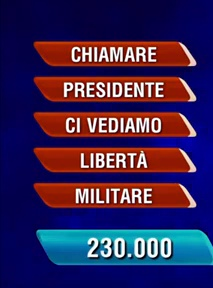

In [ ]:
import easyocr

# Create an OCR reader object
reader = easyocr.Reader(['it'])

# Read text from an image
result = reader.readtext('/content/drive/MyDrive/ghigliottinAI/frames/01-03-2022.jpg')

# Print the extracted text
for detection in result:
    print(detection[1])

#stampa l'immagine
cv2.imread('/content/drive/MyDrive/ghigliottinAI/frames/01-03-2022.jpg')

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/ghigliottinAI/dataset.csv")

for index, frame in tqdm(dataset.iterrows(), total=dataset.shape[0]):
  result = reader.readtext('/content/drive/MyDrive/ghigliottinAI/frames/' + frame.get('frame_namefile'))
  # Store extracted words as a list
  words = [detection[1] for detection in result]

  # Assign the list of words to the 'words' column
  dataset.loc[index, 'words'] = ','.join(words)


  0%|          | 0/454 [00:00<?, ?it/s]

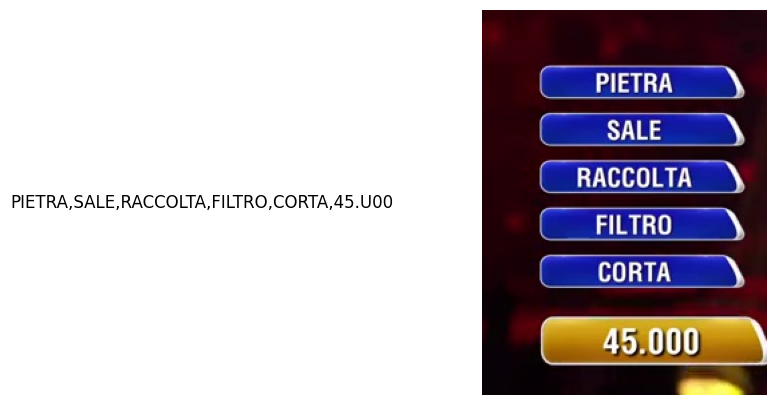

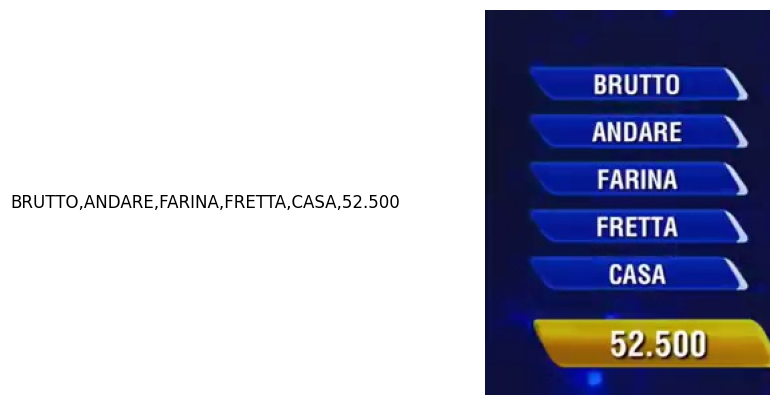

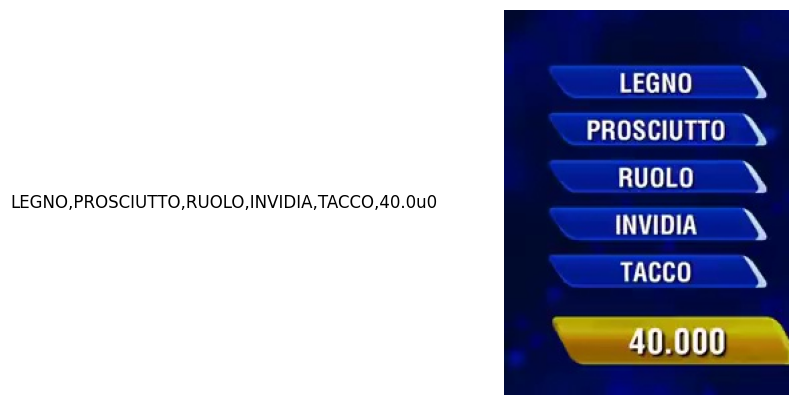

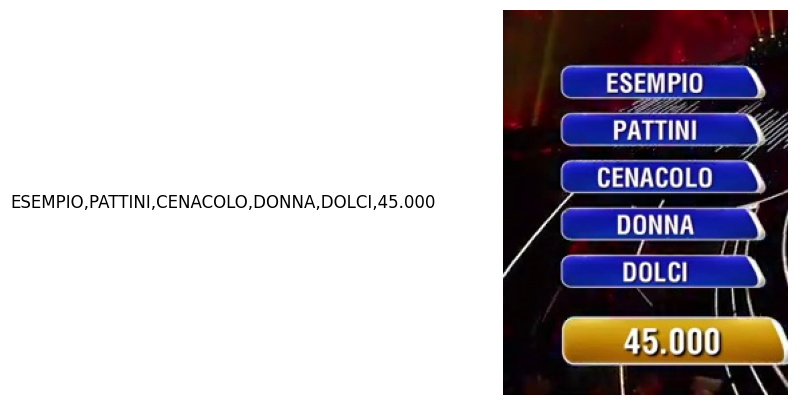

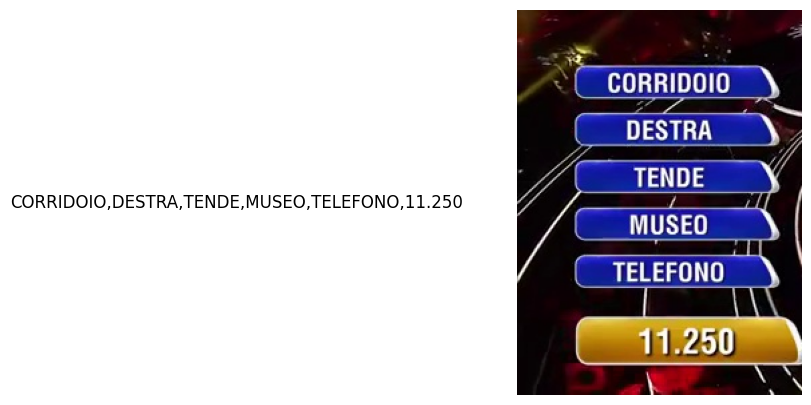

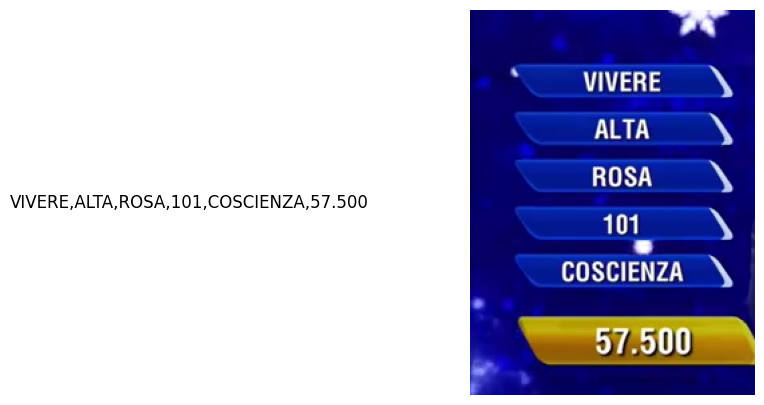

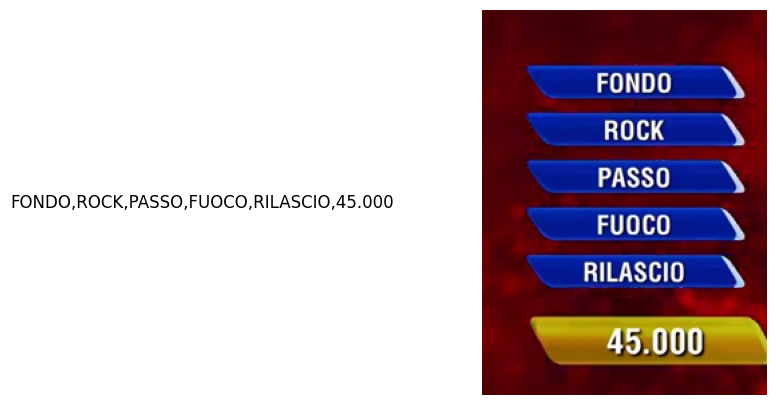

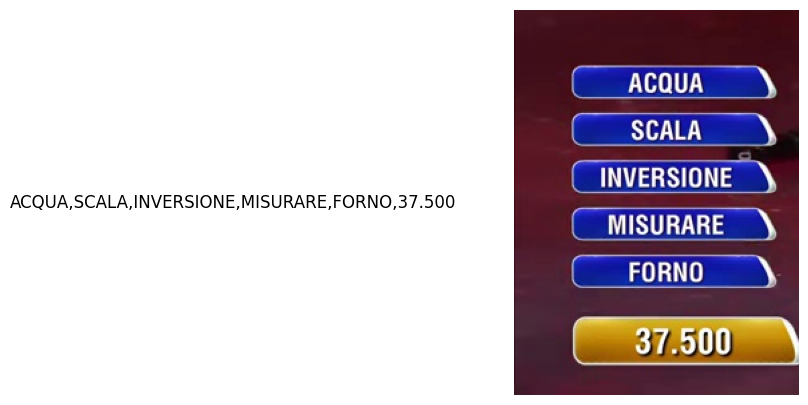

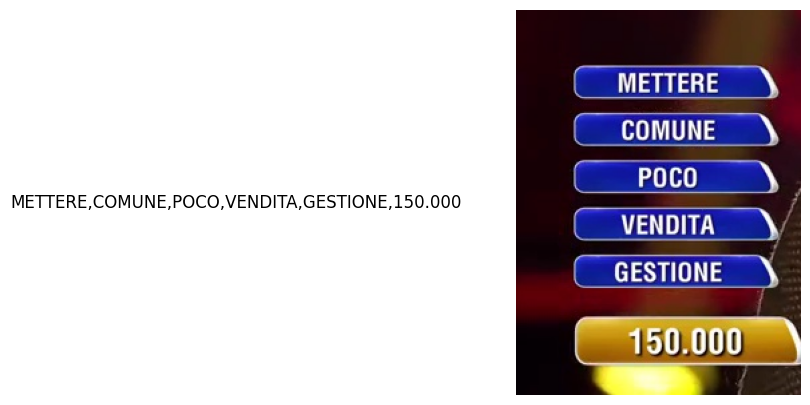

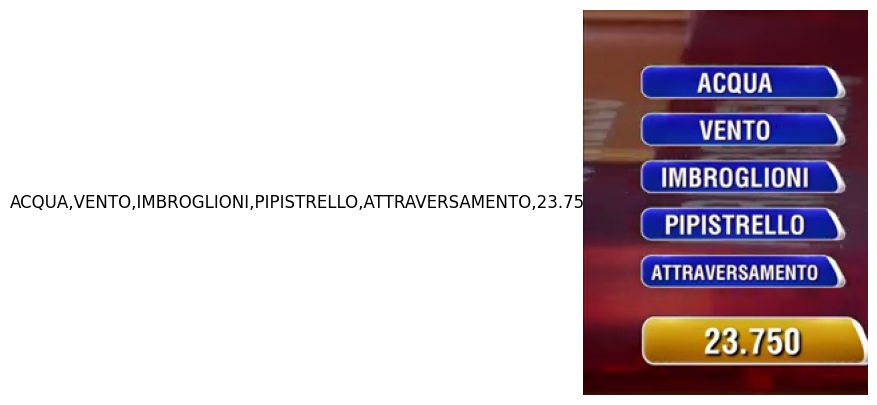

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#estraiamo 10 esempi a caso dal dataset
index = np.random.randint(0, len(dataset), 10)
for i in index:
  testo = dataset.loc[i].get('words')
  img = dataset.loc[i].get('frame_namefile')
  # Definisci il percorso dell'immagine
  immagine_path = f"/content/drive/MyDrive/ghigliottinAI/frames/{img}"

  # Carica l'immagine
  immagine = mpimg.imread(immagine_path)

  # Crea una figura e un subplot
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))

  # Visualizza il testo nel primo subplot
  ax[0].text(0.5, 0.5, testo, ha="center", va="center", fontsize=12)
  ax[0].axis("off")  # Nascondi gli assi

  # Visualizza l'immagine nel secondo subplot
  ax[1].imshow(immagine)
  ax[1].axis("off")  # Nascondi gli assi

  # Mostra la figura
  plt.show()

In [ ]:
dataset

,title,uploader,episode_day,url,frame_namefile,words
0,'La Ghigliottina - L'Eredità 19/11/2024',Rai,19/11/2024,https://www.youtube.com/watch?v=Yq5jddSisew,19-11-2024.jpg,"GIORNO,PASSARE,LIBRO,GIOCHI,REALTA,23.125"
1,'La Ghigliottina - L'Eredità 18/11/2024',Rai,18/11/2024,https://www.youtube.com/watch?v=ktmE00afoCM,18-11-2024.jpg,"METTERE,PONTEGGIO,ROMANA,ORO,FARMACISTA,47.500"
2,'La Ghigliottina - L'Eredità 17/11/2024',Rai,17/11/2024,https://www.youtube.com/watch?v=kBxDD0Ay3cg,17-11-2024.jpg,"APERTO,MINUTo,COMUNE,TORO,LAVORO,37.500"
3,'La Ghigliottina - L'Eredità 16/11/2024',Rai,16/11/2024,https://www.youtube.com/watch?v=NhXTlWDAXI8,16-11-2024.jpg,"PIEDE,SGUARDO,DIRETTO,APRIRE,TIRO,160.000"
4,'La Ghigliottina - L'Eredità 15/11/2024',Rai,15/11/2024,https://www.youtube.com/watch?v=0s-U6TXMkVA,15-11-2024.jpg,"GRUPPO,CARTA,COPPIA,PIU GRANDE,IDEA,45.000"
...,...,...,...,...,...,...
449,'La ghigliottina - L'Eredità del 16/04/2019',Rai,16/04/2019,https://www.youtube.com/watch?v=gas3BKx51fs,16-04-2019.jpg,"SERIE A,RICEVERE,ATTESA,FILM,SOCIALE,50.000"
450,'La ghigliottina - L'Eredità del 15/04/2019',Rai,15/04/2019,https://www.youtube.com/watch?v=YmtK81T44bA,15-04-2019.jpg,"FARE,DESTINO,MOVIMENTO,INNOCENTE,TELEFONO,90.000"
451,'La ghigliottina - L'Eredità del 11/04/2019',Rai,11/04/2019,https://www.youtube.com/watch?v=29Gd4KGEm6w,11-04-2019.jpg,"SEMPLICE,GUARDIA,MEZZO,CAPPELLO,VECCHIO,100.0uo"
452,'La ghigliottina - L'Eredità del 10/04/2019',Rai,10/04/2019,https://www.youtube.com/watch?v=HlzMy54Bndc,10-04-2019.jpg,"PIANO,FASCIA,AIUTO,CHAMPAGNE,SEGRETO,55.000"


In [ ]:
dataset.to_csv("/content/drive/MyDrive/ghigliottinAI/datasetOCR.csv", index=False)

I sottotitoli estratti con yt-dlp non mi piacciono, proviamo con quest'altra libreria

In [ ]:
!pip3 install youtube-transcript-api

In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/ghigliottinAI/datasetOCR.csv")

In [ ]:
dataset

,title,uploader,episode_day,url,frame_namefile,words
0,La Ghigliottina - L'EreditÃ 19/11/2024',Rai,19/11/2024,https://www.youtube.com/watch?v=Yq5jddSisew,19-11-2024.jpg,"GIORNO,PASSARE,LIBRO,GIOCHI,REALTA,23.125"
1,La Ghigliottina - L'EreditÃ 18/11/2024',Rai,18/11/2024,https://www.youtube.com/watch?v=ktmE00afoCM,18-11-2024.jpg,"METTERE,PONTEGGIO,ROMANA,ORO,FARMACISTA,47.500"
2,La Ghigliottina - L'EreditÃ 17/11/2024',Rai,17/11/2024,https://www.youtube.com/watch?v=kBxDD0Ay3cg,17-11-2024.jpg,"APERTO,MINUTo,COMUNE,TORO,LAVORO,37.500"
3,La Ghigliottina - L'EreditÃ 16/11/2024',Rai,16/11/2024,https://www.youtube.com/watch?v=NhXTlWDAXI8,16-11-2024.jpg,"PIEDE,SGUARDO,DIRETTO,APRIRE,TIRO,160.000"
4,La Ghigliottina - L'EreditÃ 15/11/2024',Rai,15/11/2024,https://www.youtube.com/watch?v=0s-U6TXMkVA,15-11-2024.jpg,"GRUPPO,CARTA,COPPIA,PIU GRANDE,IDEA,45.000"
...,...,...,...,...,...,...
449,La ghigliottina - L'EreditÃ del 16/04/2019',Rai,16/04/2019,https://www.youtube.com/watch?v=gas3BKx51fs,16-04-2019.jpg,"SERIE A,RICEVERE,ATTESA,FILM,SOCIALE,50.000"
450,La ghigliottina - L'EreditÃ del 15/04/2019',Rai,15/04/2019,https://www.youtube.com/watch?v=YmtK81T44bA,15-04-2019.jpg,"FARE,DESTINO,MOVIMENTO,INNOCENTE,TELEFONO,90.000"
451,La ghigliottina - L'EreditÃ del 11/04/2019',Rai,11/04/2019,https://www.youtube.com/watch?v=29Gd4KGEm6w,11-04-2019.jpg,"SEMPLICE,GUARDIA,MEZZO,CAPPELLO,VECCHIO,100.0uo"
452,La ghigliottina - L'EreditÃ del 10/04/2019',Rai,10/04/2019,https://www.youtube.com/watch?v=HlzMy54Bndc,10-04-2019.jpg,"PIANO,FASCIA,AIUTO,CHAMPAGNE,SEGRETO,55.000"


In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi
 #https://www.youtube.com/watch?v=zklGS4JBr-Y
# assigning srt variable with the list
# of dictionaries obtained by the get_transcript() function
for index, episode in tqdm(dataset.iterrows(), total=dataset.shape[0]):
  episode_day = episode.get('episode_day').replace('/','-')
  video_id = episode.get('url').split('=')[1]
  try:
    srt = YouTubeTranscriptApi.get_transcript(video_id, languages=['it'])
    with open(f'subtitlesNew/{episode_day}.txt', 'w') as f:
      for i in range (len(srt)):
        f.write(srt[i]['text'] + '\n')
  except:
    print(f"errore con l'episodio {episode_day}")

  0%|          | 0/454 [00:00<?, ?it/s]

In [ ]:
!cp subtitlesNew/* /content/drive/MyDrive/ghigliottinAI/subtitlesNew/

In [ ]:
!pip install gradio-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 7.2 MB/s eta 0:00:00


In [ ]:
dataset

,title,uploader,episode_day,url,frame_namefile,words
0,La Ghigliottina - L'EreditÃ 19/11/2024',Rai,19/11/2024,https://www.youtube.com/watch?v=Yq5jddSisew,19-11-2024.jpg,"GIORNO,PASSARE,LIBRO,GIOCHI,REALTA,23.125"
1,La Ghigliottina - L'EreditÃ 18/11/2024',Rai,18/11/2024,https://www.youtube.com/watch?v=ktmE00afoCM,18-11-2024.jpg,"METTERE,PONTEGGIO,ROMANA,ORO,FARMACISTA,47.500"
2,La Ghigliottina - L'EreditÃ 17/11/2024',Rai,17/11/2024,https://www.youtube.com/watch?v=kBxDD0Ay3cg,17-11-2024.jpg,"APERTO,MINUTo,COMUNE,TORO,LAVORO,37.500"
3,La Ghigliottina - L'EreditÃ 16/11/2024',Rai,16/11/2024,https://www.youtube.com/watch?v=NhXTlWDAXI8,16-11-2024.jpg,"PIEDE,SGUARDO,DIRETTO,APRIRE,TIRO,160.000"
4,La Ghigliottina - L'EreditÃ 15/11/2024',Rai,15/11/2024,https://www.youtube.com/watch?v=0s-U6TXMkVA,15-11-2024.jpg,"GRUPPO,CARTA,COPPIA,PIU GRANDE,IDEA,45.000"
...,...,...,...,...,...,...
449,La ghigliottina - L'EreditÃ del 16/04/2019',Rai,16/04/2019,https://www.youtube.com/watch?v=gas3BKx51fs,16-04-2019.jpg,"SERIE A,RICEVERE,ATTESA,FILM,SOCIALE,50.000"
450,La ghigliottina - L'EreditÃ del 15/04/2019',Rai,15/04/2019,https://www.youtube.com/watch?v=YmtK81T44bA,15-04-2019.jpg,"FARE,DESTINO,MOVIMENTO,INNOCENTE,TELEFONO,90.000"
451,La ghigliottina - L'EreditÃ del 11/04/2019',Rai,11/04/2019,https://www.youtube.com/watch?v=29Gd4KGEm6w,11-04-2019.jpg,"SEMPLICE,GUARDIA,MEZZO,CAPPELLO,VECCHIO,100.0uo"
452,La ghigliottina - L'EreditÃ del 10/04/2019',Rai,10/04/2019,https://www.youtube.com/watch?v=HlzMy54Bndc,10-04-2019.jpg,"PIANO,FASCIA,AIUTO,CHAMPAGNE,SEGRETO,55.000"


In [ ]:
def create_prompt(subtitles, wordsList):
  prompt = f"""{subtitles}  \nDal dialogo precedente estrai la soluzione corretta che viene specificata proprio alla fine, stai attento a non confonderti con la soluzione errata data dal giocatore. Inoltre estrai per ognuna delle 5 parole anche il motivo per il quale la soluzione , cioè la sesta parola, è legata alle 5 parole  parole ({', '.join(wordsList)}), qual è il legame tra ognuna delle 5 parole e la soluzione? Non devi spiegarmi cosa succede nel dialogo, voglio solo la spiegazione che lega ognuna delle 5 parole alla soluzione finale. La spiegazione viene data verso la fine del dialogo.
  \nScrivi l'output in un formato testuale che simuli il json, ho bisogno del raw text json
  {{
  "clue": ["parola1", "parola2", "parola3", "parola4", "parola5"],
  "explanation": [
  "spiegazione1",
  "spiegazione2",
  "spiegazione3",
  "spiegazione4",
  "spiegazione5"
  ],
  "solution": "soluzione"
  }}

  """

  return prompt

In [ ]:
#proviamo con gemini api
from google import genai
from google.colab import userdata
import pandas as pd
import json
import re
import time
from tqdm import tqdm

#dataset_fin = pd.DataFrame()
start_index = dataset_fin.shape[0] # Start from the current size of dataset_fin
for i,row in tqdm(dataset.iloc[start_index:].iterrows(), total=len(dataset)-start_index):
  nameFile = row.get('frame_namefile').replace('jpg', 'txt')
  words = row.get('words')
  wordsList = words.split(',')[:5]
  with open(f'drive/MyDrive/ghigliottinAI/subtitlesNew/{nameFile}', 'r') as f:
    subtitles = f.read()
  #print(wordsList)
  #print(nameFile)
  message = create_prompt(subtitles, wordsList)
  #print(message)

  client = genai.Client(api_key=userdata.get("GEMINI_KEY"))

  response = client.models.generate_content(
      model="models/gemini-flash-lite-latest",
      contents=message,
  )
  # json_format = re.sub(r"^```json\s*|```$", "", response.text, flags=re.MULTILINE).strip()
  # json_response = json.loads(json_format)
  riga = row.to_dict()
  # riga['solution'] = json_response['solution'].upper()
  riga['result'] = response.text

  dataset_fin = pd.concat([dataset_fin, pd.DataFrame([riga])], ignore_index=True)


  # print(json_response)
  # print(json.loads(json_response)['solution'].uppercase())
  if i%15==0:
    time.sleep(70)

100%|██████████| 154/154 [17:49<00:00,  6.95s/it]


In [ ]:
dataset_fin.shape[0]

300

In [ ]:
#dataset_fin.to_csv("/content/drive/MyDrive/ghigliottinAI/dataset_raw_solution.csv", index=False)

In [ ]:
#dataset_fin = pd.read_csv("/content/drive/MyDrive/ghigliottinAI/dataset_raw_solution.csv")

In [ ]:
import json
jsons = []
for elem in dataset_fin['result']:
  # print(elem)
  json_format = re.sub(r"^```json\s*|```$", "", elem, flags=re.MULTILINE).strip()
  json_format = re.sub(r",\s*([\]\}])", r"\1", json_format)
  json_response = json.loads(json_format)
  jsons.append(json_response)
dataset_fin = pd.concat([dataset_fin, pd.DataFrame(jsons)], axis=1)
dataset_fin['solution'] = dataset_fin['solution'].str.upper()
dataset_fin

,title,uploader,episode_day,url,frame_namefile,words,result,clue,explanation,solution
0,La Ghigliottina - L'EreditÃ 19/11/2024',Rai,19/11/2024,https://www.youtube.com/watch?v=Yq5jddSisew,19-11-2024.jpg,"GIORNO,PASSARE,LIBRO,GIOCHI,REALTA,23.125","```json\n{\n ""clue"": [""GIORNO"", ""PASSARE"", ""L...","[GIORNO, PASSARE, LIBRO, GIOCHI, REALTA]",[fatti del giorno (quelli raccontati nei progr...,FATTI
1,La Ghigliottina - L'EreditÃ 18/11/2024',Rai,18/11/2024,https://www.youtube.com/watch?v=ktmE00afoCM,18-11-2024.jpg,"METTERE,PONTEGGIO,ROMANA,ORO,FARMACISTA,47.500","```json\n{\n ""clue"": [\n ""METTERE"",\n ""...","[METTERE, PONTEGGIO, ROMANA, ORO, FARMACISTA]","[Mettere sulla bilancia., Il ponteggio (o bila...",BILANCIA
2,La Ghigliottina - L'EreditÃ 17/11/2024',Rai,17/11/2024,https://www.youtube.com/watch?v=kBxDD0Ay3cg,17-11-2024.jpg,"APERTO,MINUTo,COMUNE,TORO,LAVORO,37.500","```json\n{\n ""clue"": [\n ""APERTO"",\n ""M...","[APERTO, MINUTO, COMUNE, TORO, LAVORO]","[Mercato aperto, Mercato al minuto, Mercato co...",MERCATO
3,La Ghigliottina - L'EreditÃ 16/11/2024',Rai,16/11/2024,https://www.youtube.com/watch?v=NhXTlWDAXI8,16-11-2024.jpg,"PIEDE,SGUARDO,DIRETTO,APRIRE,TIRO,160.000","```json\n{\n ""clue"": [\n ""PIEDE"",\n ""SG...","[PIEDE, SGUARDO, DIRETTO, APRIRE, TIRO]",[La parola 'PIEDE' è collegata al titolo di un...,SINISTRO
4,La Ghigliottina - L'EreditÃ 15/11/2024',Rai,15/11/2024,https://www.youtube.com/watch?v=0s-U6TXMkVA,15-11-2024.jpg,"GRUPPO,CARTA,COPPIA,PIU GRANDE,IDEA,45.000","```json\n{\n ""clue"": [""GRUPPO"", ""CARTA"", ""COP...","[GRUPPO, CARTA, COPPIA, PIU GRANDE, IDEA]",[Regalo di gruppo: si crea un gruppo (ad esemp...,REGALO
...,...,...,...,...,...,...,...,...,...,...
449,La ghigliottina - L'EreditÃ del 16/04/2019',Rai,16/04/2019,https://www.youtube.com/watch?v=gas3BKx51fs,16-04-2019.jpg,"SERIE A,RICEVERE,ATTESA,FILM,SOCIALE,50.000","```json\n{\n ""clue"": [\n ""SERIE A"",\n ""...","[SERIE A, RICEVERE, ATTESA, FILM, SOCIALE]",[dalla serie b siamo promossi in serie a con u...,PROMOZIONE
450,La ghigliottina - L'EreditÃ del 15/04/2019',Rai,15/04/2019,https://www.youtube.com/watch?v=YmtK81T44bA,15-04-2019.jpg,"FARE,DESTINO,MOVIMENTO,INNOCENTE,TELEFONO,90.000","```json\n{\n ""clue"": [""FARE"", ""DESTINO"", ""MOV...","[FARE, DESTINO, MOVIMENTO, INNOCENTE, TELEFONO]","[Fare uno scherzo, Scherzo del destino, Un mov...",SCHERZO
451,La ghigliottina - L'EreditÃ del 11/04/2019',Rai,11/04/2019,https://www.youtube.com/watch?v=29Gd4KGEm6w,11-04-2019.jpg,"SEMPLICE,GUARDIA,MEZZO,CAPPELLO,VECCHIO,100.0uo","```json\n{\n ""clue"": [\n ""SEMPLICE"",\n ...","[SEMPLICE, GUARDIA, MEZZO, CAPPELLO, VECCHIO]","[Il marinaio semplice, Il marinaio è di guardi...",MARINAIO
452,La ghigliottina - L'EreditÃ del 10/04/2019',Rai,10/04/2019,https://www.youtube.com/watch?v=HlzMy54Bndc,10-04-2019.jpg,"PIANO,FASCIA,AIUTO,CHAMPAGNE,SEGRETO,55.000","```json\n{\n ""clue"": [\n ""PIANO"",\n ""FA...","[PIANO, FASCIA, AIUTO, CHAMPAGNE, SEGRETO]",[Piano si lega a 'cameriere al piano' (servizi...,CAMERIERE


In [ ]:
dataset_fin.to_csv("/content/drive/MyDrive/ghigliottinAI/dataset_final-gemini2-5.csv", index=False)

In [ ]:
print(dataset_fin['explanation'][1])

['Mettere sulla bilancia.', 'Il ponteggio (o bilancia) per gli operai che puliscono i vetri dei grattacieli.', 'La bilancia Romana è uno strumento di misurazione (quella col gancio usata dai fruttivendoli).', "La bilancia per l'oro (del comproro/gioielliere).", 'Il farmacista usa la bilancia (per le preparazioni galeniche e per essere precisi).']


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
def create_prompt_cot(wordslist, solution):
  prompt = f"""Date queste 5 parole [{wordslist}] non legate tra loro, ho trovato una sesta parola [{solution}] in comune che risulta essere legata ad ognuna delle 5 parole.
  Genera un chain-of-thought BREVE E STRUTTURATO (massimo 100 parole) che a partire dalle 5 parole NON CORRELATE che ti ho dato arrivi alla soluzione specificata prima, cioè {solution}, cercando di trovare il legame tra {solution} e ognuna delle 5 parole in input prese singolarmente.
  Nota che devi simulare una CoT senza citare questa simulazione, inoltre tu devi supporre di non conoscere la soluzione ma di arrivarci tramite CoT.
  Alla fine della CoT, come ultima riga, scrivi la soluzione trovata in questo formato:
  Soluzione trovata: [soluzione]
  """

  return prompt

In [10]:
from google import genai
from google.colab import userdata
import pandas as pd
import json
import re
import time
from tqdm import tqdm

dataset_fin = pd.read_csv("/content/drive/MyDrive/ghigliottinAI/dataset_final-gemini2-5.csv")
start_index = 0# Start from the current size of dataset_fin
for i,row in tqdm(dataset_fin.iloc[start_index:].iterrows(), total=len(dataset_fin)-start_index):
  message = create_prompt_cot(row.get('clue'), row.get('solution'))
  #print(message)
  client = genai.Client(api_key=userdata.get("GEMINI_KEY"))

  response = client.models.generate_content(
      model="models/gemini-flash-lite-latest",
      contents=message,
  )
  # json_format = re.sub(r"^```json\s*|```$", "", response.text, flags=re.MULTILINE).strip()
  # json_response = json.loads(json_format)
  riga = row.to_dict()
  # riga['solution'] = json_response['solution'].upper()
  riga['cot'] = response.text

  #aggiungi la response.text alla colonna cot del dataset_fin
  dataset_fin.loc[i, 'cot'] = response.text

  # print(json_response)
  # print(json.loads(json_response)['solution'].uppercase())
  if i%15==0:
    print(response.text)
    time.sleep(70)

  0%|          | 0/454 [00:00<?, ?it/s]

Analizzo le parole: GIORNO, PASSARE, LIBRO, GIOCHI, REALTA. Cerco un concetto unificante.
GIORNO: È un'unità di tempo misurabile; si registrano i **fatti** accaduti.
PASSARE: Implica lo scorrere del tempo e la successione di eventi o **fatti**.
LIBRO: Contiene narrazioni, informazioni, cioè una raccolta di **fatti** scritti.
GIOCHI: Possono avere regole, risultati oggettivi, ovvero i **fatti** del gioco.
REALTA': L'insieme di ciò che esiste e può essere verificato tramite **fatti**.
Tutte le parole possono essere collegate a ciò che è oggettivo, verificabile o registrato come evento.

Soluzione trovata: FATTI


  3%|▎         | 15/454 [01:41<15:12,  2.08s/it]

Analizzo ogni parola per trovare un legame comune con un genere musicale o un concetto ampio.
LATINO si lega a generi come Latin Rock.
OPERA può avere influenze rock (Rock Opera).
TEMPO può riferirsi al ritmo o a canzoni rock famose (es. "Stairway to Heaven" come epica).
LEGGENDA si associa a band o artisti Rock iconici (Rock Legends).
BACIO può essere il titolo di una canzone rock o un tema lirico.
Il denominatore comune più forte e trasversale che collega tutti questi ambiti (genere musicale, opere, icone, titoli) è il **ROCK**.

Soluzione trovata: [ROCK]


  7%|▋         | 30/454 [03:22<16:32,  2.34s/it]

Analizzo le parole: "testa", "fine", "produzione", "modello", "pilota". Cerco un concetto unificante.
"Testa" può essere l'inizio di una "serie" (es. di eventi). "Fine" è l'opposto, la conclusione di una "serie". "Produzione" spesso si riferisce a una "serie" di oggetti. Un "modello" è spesso parte di una "serie" di versioni. Il "pilota" può essere il primo episodio di una "serie" televisiva o un test iniziale di una "serie". Il nesso sembra essere un concetto sequenziale o di gruppo.

Soluzione trovata: [SERIE]


 10%|▉         | 45/454 [05:04<15:32,  2.28s/it]

Analizzo le parole: 'prima', 'elettrico', 'messa', 'causa', 'pubblico'. Cerco un concetto unificante.

1. **Pubblico** può riferirsi a un luogo o a un'utenza, spesso legata a un **servizio** (es. servizio pubblico).
2. **Elettrico** può descrivere un tipo di fornitura o infrastruttura, come il **servizio** elettrico.
3. **Messa** può essere vista come l'atto di fornire o iniziare qualcosa, simile all'erogazione di un **servizio**.
4. **Causa** in alcuni contesti indica la ragione di un'azione, ma collegata a 'pubblico' può richiamare un **servizio** di pubblica utilità o un **servizio** di assistenza (causa legale).
5. **Prima** può indicare una fase preliminare all'erogazione, come un **servizio** reso in anticipo o per primo.

Il nesso comune che collega tutte queste parole è l'ambito di erogazione e fruizione di utilità.

Soluzione trovata: [SERVIZIO]


 13%|█▎        | 57/454 [06:40<46:26,  7.02s/it]


KeyboardInterrupt: 

In [7]:
dataset_fin.to_csv("/content/drive/MyDrive/ghigliottinAI/dataset_cot6.csv", index=False)

In [8]:
print(f"{dataset_fin.loc[0].get('clue')} \n{dataset_fin.loc[0].get('solution')} \n{dataset_fin.loc[0].get('cot')}")

['GIORNO', 'PASSARE', 'LIBRO', 'GIOCHI', 'REALTA'] 
FATTI 
Analizzo le parole: GIORNO, PASSARE, LIBRO, GIOCHI, REALTA. Cerco un concetto astratto che le unisca.
GIORNO e PASSARE suggeriscono il fluire del tempo o eventi accaduti. LIBRO e GIOCHI possono contenere narrazioni o eventi simulati/descritti. REALTA è ciò che è oggettivo e verificabile.
Un elemento comune a narrazioni (LIBRO, GIOCHI), al tempo che scorre (GIORNO, PASSARE) e all'oggettività (REALTA) è l'insieme di elementi concreti e verificabili che compongono una storia o un'esistenza. Questi elementi sono i FATTI. I fatti sono ciò che si racconta, si sperimenta o si registra.

Soluzione trovata: [FATTI]


In [5]:
def check_cot_solution_match(row):
  """Checks if the last word of the 'cot' column matches the 'solution' column."""
  cot = row.get('cot')
  solution = row.get('solution')
  if pd.isna(cot) or pd.isna(solution):
    return False # Handle missing values

  cot_words = cot.split(':')
  if not cot_words: # Handle empty cot string
    return False

  last_word_cot = cot_words[-1].strip("[]").replace('[','').replace(']', '').strip()
  if not last_word_cot.upper() == solution.upper():
    print(last_word_cot)
  return last_word_cot.upper() == solution.upper()

# Apply the check to each row and create a new column 'match'
dataset_fin['match'] = dataset_fin.apply(check_cot_solution_match, axis=1)

# Print rows where the match is False
mismatches = dataset_fin[dataset_fin['match'] == False]

if mismatches.empty:
  print("All 'cot' last words match the 'solution'.")
else:
  print("Mismatches found:")
  display(mismatches[['clue', 'solution', 'cot']])

STATO
VITA
Mismatches found:


,clue,solution,cot
73,"['SCIENTIFICO', 'LEGGE', 'FATTO', 'DIRITTO', '...",NOME,"Analizzo le parole: SCIENTIFICO, LEGGE, FATTO,..."
190,"['AMORE', 'CROCE', 'SPERANZA', 'GIOCARE', 'SOLO']",PAROLE,"Analizzo le parole: AMORE, CROCE, SPERANZA, GI..."


In [6]:
#estrai le colonne ['clue', 'solution' e 'cot' della prima riga
dataset_fin = dataset_fin[['clue', 'solution', 'cot','match']]
dataset_fin

,clue,solution,cot,match
0,"['GIORNO', 'PASSARE', 'LIBRO', 'GIOCHI', 'REAL...",FATTI,"Analizzo le parole: GIORNO, PASSARE, LIBRO, GI...",True
1,"['METTERE', 'PONTEGGIO', 'ROMANA', 'ORO', 'FAR...",BILANCIA,"Analizzo le parole: 'METTERE', 'PONTEGGIO', 'R...",True
2,"['APERTO', 'MINUTO', 'COMUNE', 'TORO', 'LAVORO']",MERCATO,"Analizzo le parole: **APERTO**, **MINUTO**, **...",True
3,"['PIEDE', 'SGUARDO', 'DIRETTO', 'APRIRE', 'TIRO']",SINISTRO,"Analizzo le parole: PIEDE, SGUARDO, DIRETTO, A...",True
4,"['GRUPPO', 'CARTA', 'COPPIA', 'PIU GRANDE', 'I...",REGALO,"Analizzo le parole: GRUPPO, CARTA, COPPIA, PIÙ...",True
...,...,...,...,...
449,"['SERIE A', 'RICEVERE', 'ATTESA', 'FILM', 'SOC...",PROMOZIONE,"Analizzo i termini: 'SERIE A', 'RICEVERE', 'AT...",True
450,"['FARE', 'DESTINO', 'MOVIMENTO', 'INNOCENTE', ...",SCHERZO,"Analizzo le parole: FARE, DESTINO, MOVIMENTO, ...",True
451,"['SEMPLICE', 'GUARDIA', 'MEZZO', 'CAPPELLO', '...",MARINAIO,"Analizzo le parole: SEMPLICE, GUARDIA, MEZZO, ...",True
452,"['PIANO', 'FASCIA', 'AIUTO', 'CHAMPAGNE', 'SEG...",CAMERIERE,"Analizzo le parole: PIANO, FASCIA, AIUTO, CHAM...",True


In [ ]:
dataset_fin.iloc[1]['cot']

nan

In [ ]:
from openai import OpenAI
import time

def inference_openRouter(prompt, model = "deepseek/deepseek-r1-distill-llama-70b:free"):
  start_time = time.time()
  client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key="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",
  )

  completion = client.chat.completions.create(
    # extra_headers={
    #   "HTTP-Referer": "<YOUR_SITE_URL>", # Optional. Site URL for rankings on openrouter.ai.
    #   "X-Title": "<YOUR_SITE_NAME>", # Optional. Site title for rankings on openrouter.ai.
    # },
    extra_body={},
    model= model,
    messages=[
      {
        "role": "user",
        "content": prompt
      }
    ]
  )

  end_time = time.time()  # Fine del timer

  elapsed_time = end_time - start_time
  return completion.choices[0].message.content, elapsed_time
  # print(f'tempo impiegato a rispondere: {elapsed_time}')
  # print(completion.choices[0].message.content)

def inference_gemini(prompt):
  from google import genai

  start_time = time.time()

  client = genai.Client(api_key=userdata.get("GEMINI_KEY"))

  response = client.models.generate_content(
      model="gemini-2.0-flash",
      contents=prompt,
  )
  end_time = time.time()  # Fine del timer

  elapsed_time = end_time - start_time

  return response.text, elapsed_time

In [ ]:
def create_prompts(words):
  return f'''Sei un risolutore di un gioco italiano in cui dato un insieme di 5 parole (clues), devi trovare la soluzione che consiste in una sesta parola legata ad ognuna delle 5 parole date in input. Le 5 parole in input non sono legate tra loro.

  Per esempio: date in input le parole: (conoscere, grado, modello, ideale, divina), la soluzione è perfezione. Perché ‘conoscere alla perfezione’, ‘grado di perfezione’, ‘modello di perfezione’, ‘ideale di perfezione’ e ‘perfezione divina’.

  Tieni in considerazione che le connessioni ‘clue-soluzioni’ seguono 6 pattern:


  - A B pattern: per esempio ‘diario segreto’, ‘brutta caduta’

  - A  B pattern: per esempio ‘dare il permesso’

  - A  B pattern: per esempio ‘colpo di coda’

  - A  B pattern: per esempio ‘stima e affetto’

  - A  B pattern: per esempio ‘virtù dei forti’

  - A+B pattern: per esempio ‘radioattività’ (radio + attività)



  Per le soluzioni devi tenere conto dei proverbi italiani, dei modi di dire italiani e della cultura italiana e generale.

  Date 5 parole in input dammi la soluzione più probabile che segue queste regole.

  queste sono le 5 parole: {words}. '''

In [ ]:
##proviamo deepseek o gemini
for i,row in tqdm(dataset_fin.iterrows(), total=len(dataset)):
  clues = row.get('clue')
  prompt = create_prompts(", ".join(clues).upper())
  solution, elapsed_time = inference_openRouter(prompt)
  print(prompt)
  print(f'tempo impiegato a rispondere: {elapsed_time}')
  print(solution)
  print(f"Soluzione corretta: {row.get('solution')}")
  print('-------------------------\n')
  if i==5:
    break

  0%|          | 1/454 [00:16<2:03:08, 16.31s/it]

Sei un risolutore di un gioco italiano in cui dato un insieme di 5 parole (clues), devi trovare la soluzione che consiste in una sesta parola legata ad ognuna delle 5 parole date in input. Le 5 parole in input non sono legate tra loro.
  
  Per esempio: date in input le parole: (conoscere, grado, modello, ideale, divina), la soluzione è perfezione. Perché ‘conoscere alla perfezione’, ‘grado di perfezione’, ‘modello di perfezione’, ‘ideale di perfezione’ e ‘perfezione divina’.
  
  Tieni in considerazione che le connessioni ‘clue-soluzioni’ seguono 6 pattern:
  
  
  - A B pattern: per esempio ‘diario segreto’, ‘brutta caduta’
  
  - A  B pattern: per esempio ‘dare il permesso’
  
  - A  B pattern: per esempio ‘colpo di coda’
  
  - A  B pattern: per esempio ‘stima e affetto’
  
  - A  B pattern: per esempio ‘virtù dei forti’
  
  - A+B pattern: per esempio ‘radioattività’ (radio + attività)
  

  
  Per le soluzioni devi tenere conto dei proverbi italiani, dei modi di dire italiani e d

  0%|          | 2/454 [01:00<4:04:49, 32.50s/it]

Sei un risolutore di un gioco italiano in cui dato un insieme di 5 parole (clues), devi trovare la soluzione che consiste in una sesta parola legata ad ognuna delle 5 parole date in input. Le 5 parole in input non sono legate tra loro.
  
  Per esempio: date in input le parole: (conoscere, grado, modello, ideale, divina), la soluzione è perfezione. Perché ‘conoscere alla perfezione’, ‘grado di perfezione’, ‘modello di perfezione’, ‘ideale di perfezione’ e ‘perfezione divina’.
  
  Tieni in considerazione che le connessioni ‘clue-soluzioni’ seguono 6 pattern:
  
  
  - A B pattern: per esempio ‘diario segreto’, ‘brutta caduta’
  
  - A  B pattern: per esempio ‘dare il permesso’
  
  - A  B pattern: per esempio ‘colpo di coda’
  
  - A  B pattern: per esempio ‘stima e affetto’
  
  - A  B pattern: per esempio ‘virtù dei forti’
  
  - A+B pattern: per esempio ‘radioattività’ (radio + attività)
  

  
  Per le soluzioni devi tenere conto dei proverbi italiani, dei modi di dire italiani e d

  1%|          | 3/454 [02:17<6:39:23, 53.13s/it]

Sei un risolutore di un gioco italiano in cui dato un insieme di 5 parole (clues), devi trovare la soluzione che consiste in una sesta parola legata ad ognuna delle 5 parole date in input. Le 5 parole in input non sono legate tra loro.
  
  Per esempio: date in input le parole: (conoscere, grado, modello, ideale, divina), la soluzione è perfezione. Perché ‘conoscere alla perfezione’, ‘grado di perfezione’, ‘modello di perfezione’, ‘ideale di perfezione’ e ‘perfezione divina’.
  
  Tieni in considerazione che le connessioni ‘clue-soluzioni’ seguono 6 pattern:
  
  
  - A B pattern: per esempio ‘diario segreto’, ‘brutta caduta’
  
  - A  B pattern: per esempio ‘dare il permesso’
  
  - A  B pattern: per esempio ‘colpo di coda’
  
  - A  B pattern: per esempio ‘stima e affetto’
  
  - A  B pattern: per esempio ‘virtù dei forti’
  
  - A+B pattern: per esempio ‘radioattività’ (radio + attività)
  

  
  Per le soluzioni devi tenere conto dei proverbi italiani, dei modi di dire italiani e d

  1%|          | 4/454 [02:47<5:27:36, 43.68s/it]

Sei un risolutore di un gioco italiano in cui dato un insieme di 5 parole (clues), devi trovare la soluzione che consiste in una sesta parola legata ad ognuna delle 5 parole date in input. Le 5 parole in input non sono legate tra loro.
  
  Per esempio: date in input le parole: (conoscere, grado, modello, ideale, divina), la soluzione è perfezione. Perché ‘conoscere alla perfezione’, ‘grado di perfezione’, ‘modello di perfezione’, ‘ideale di perfezione’ e ‘perfezione divina’.
  
  Tieni in considerazione che le connessioni ‘clue-soluzioni’ seguono 6 pattern:
  
  
  - A B pattern: per esempio ‘diario segreto’, ‘brutta caduta’
  
  - A  B pattern: per esempio ‘dare il permesso’
  
  - A  B pattern: per esempio ‘colpo di coda’
  
  - A  B pattern: per esempio ‘stima e affetto’
  
  - A  B pattern: per esempio ‘virtù dei forti’
  
  - A+B pattern: per esempio ‘radioattività’ (radio + attività)
  

  
  Per le soluzioni devi tenere conto dei proverbi italiani, dei modi di dire italiani e d

  1%|          | 5/454 [03:01<4:08:32, 33.21s/it]

Sei un risolutore di un gioco italiano in cui dato un insieme di 5 parole (clues), devi trovare la soluzione che consiste in una sesta parola legata ad ognuna delle 5 parole date in input. Le 5 parole in input non sono legate tra loro.
  
  Per esempio: date in input le parole: (conoscere, grado, modello, ideale, divina), la soluzione è perfezione. Perché ‘conoscere alla perfezione’, ‘grado di perfezione’, ‘modello di perfezione’, ‘ideale di perfezione’ e ‘perfezione divina’.
  
  Tieni in considerazione che le connessioni ‘clue-soluzioni’ seguono 6 pattern:
  
  
  - A B pattern: per esempio ‘diario segreto’, ‘brutta caduta’
  
  - A  B pattern: per esempio ‘dare il permesso’
  
  - A  B pattern: per esempio ‘colpo di coda’
  
  - A  B pattern: per esempio ‘stima e affetto’
  
  - A  B pattern: per esempio ‘virtù dei forti’
  
  - A+B pattern: per esempio ‘radioattività’ (radio + attività)
  

  
  Per le soluzioni devi tenere conto dei proverbi italiani, dei modi di dire italiani e d

  1%|          | 5/454 [03:09<4:44:03, 37.96s/it]

Sei un risolutore di un gioco italiano in cui dato un insieme di 5 parole (clues), devi trovare la soluzione che consiste in una sesta parola legata ad ognuna delle 5 parole date in input. Le 5 parole in input non sono legate tra loro.
  
  Per esempio: date in input le parole: (conoscere, grado, modello, ideale, divina), la soluzione è perfezione. Perché ‘conoscere alla perfezione’, ‘grado di perfezione’, ‘modello di perfezione’, ‘ideale di perfezione’ e ‘perfezione divina’.
  
  Tieni in considerazione che le connessioni ‘clue-soluzioni’ seguono 6 pattern:
  
  
  - A B pattern: per esempio ‘diario segreto’, ‘brutta caduta’
  
  - A  B pattern: per esempio ‘dare il permesso’
  
  - A  B pattern: per esempio ‘colpo di coda’
  
  - A  B pattern: per esempio ‘stima e affetto’
  
  - A  B pattern: per esempio ‘virtù dei forti’
  
  - A+B pattern: per esempio ‘radioattività’ (radio + attività)
  

  
  Per le soluzioni devi tenere conto dei proverbi italiani, dei modi di dire italiani e d

In [ ]:
from gradio_client import Client

dataset_fin = pd.DataFrame()
for i,row in dataset.iterrows():
  nameFile = row.get('frame_namefile').replace('jpg', 'txt')
  words = row.get('words')
  wordsList = words.split(',')[:5]
  with open(f'drive/MyDrive/ghigliottinAI/subtitlesNew/{nameFile}', 'r') as f:
    subtitles = f.read()
  print(wordsList)
  print(nameFile)
  message = create_prompt(subtitles, wordsList)
  #print(message)

  client = Client("ninooo96/gemma2-9B-test")
  result = client.predict(
      message=message,
      system_message="You are a friendly Chatbot, who extract information from italian dialogue",
      max_tokens=512,
      temperature=0.9,
      top_p=0.95,
      api_name="/chat"
  )
  riga = row.to_dict()
  riga['result'] = result
  dataset_fin = pd.concat([dataset_fin, pd.DataFrame([riga])], ignore_index=True)
  print(result)
  if i==3:
    break

['GIORNO', 'PASSARE', 'LIBRO', 'GIOCHI', 'REALTA']
19-11-2024.txt
Loaded as API: https://ninooo96-gemma2-9b-test.hf.space ✔
 {
  "clue": ["GIORNO", "PASSARE", "LIбро", "GIOCHI", "REALTA"],
  "explanation": [
  "La parola 'Giorno' è legata alla soluzione finale perché viene utilizzata per descrivere gli eventi di una data giornata, mentre la parola 'Passare' suggerisce l'attraversamento dei fatti della giornata.",
  "La parola 'Libro' è legata alla soluzione perché viene utilizzata per descrivere un libro che racconta gli eventi di una data giornata, come il 'libro dei fatti' o il 'libro dei record'.",
  "La parola 'Giochi' è legata alla soluzione perché viene utilizzata per descrivere attività o giochi che sono legati alla realtà dei fatti, ad esempio 'giochi di carte' o 'giochi da tavolo' che possono essere usati per stimare o simulare determinati fatti.",
  "La parola 'Realtà' è legata alla soluzione perché suggerisce la verità o la realtà dei fatti, per cui la parola che deve essere

In [ ]:
dataset_fin['result'][0]

' {\n  "clue": ["GIORNO", "PASSARE", "LIBRO", "GIOCHI", "REALTA"],\n  "explanation": [\n  "La parola giorno viene collegata ai fatti del giorno, cioè alla realtà dei fatti che vengono raccontati nei programmi di attualità.",\n  "Passare si riferisce al passaggio dalle parole ai fatti.",\n  "Il libro rappresenta i fatti, come ad esempio il libro dei fatti del de Guinness World Record.",\n  "Giochi fatti è un modo di dire che si riferisce alla realtà dei fatti.",\n  "La parola realtà viene legata alla parola fatti perché la realtà rappresenta la verità e la realtà dei fatti è il fatto in sé."\n  ],\n  "solution": "fatti"\n  }'

##test local llm

In [ ]:
!pip install -U transformers --upgrade
!pip install accelerate
!pip install -i https://pypi.org/simple/ bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
Looking in indexes: https://pypi.org/simple/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, pipeline
import torch

model = "google/gemma-2-9b"
# use quantized model
pipeline = pipeline(
    "text-generation",
    model=model,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True}
    },
)


messages = [
    {"role": "user", "content": "Tell me about ChatGPT"},
]
prompt = pipeline.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipeline(
    prompt,
    max_new_tokens=256,
    do_sample=True,
    temperature=0.7,
    top_k=50,
    top_p=0.95
)
print(outputs[0]["generated_text"][len(prompt):])

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/4.84G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/2.38G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

ValueError: Cannot use chat template functions because tokenizer.chat_template is not set and no template argument was passed! For information about writing templates and setting the tokenizer.chat_template attribute, please see the documentation at https://huggingface.co/docs/transformers/main/en/chat_templating

In [ ]:
import torch
from transformers import pipeline

pipe = pipeline(
    "text-generation",
    model="google/gemma-2-9b",
    device="cuda",  # replace with "mps" to run on a Mac device
)

text = "Once upon a time,"
outputs = pipe(text, max_new_tokens=256)
response = outputs[0]["generated_text"]
print(response)


config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/4.84G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/2.38G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 56.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 45.06 MiB is free. Process 4802 has 14.70 GiB memory in use. Of the allocated memory 14.60 GiB is allocated by PyTorch, and 1.17 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
#del pipe  # Se pipe è ancora in memoria
gc.collect()
torch.cuda.empty_cache()

In [ ]:
# pip install bitsandbytes accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(load_in_4bit=True)

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-9b")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-2-9b",
    quantization_config=quantization_config,
)

input_text = "Write me a poem about Machine Learning."
input_ids = tokenizer(input_text, return_tensors="pt").to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=32)
print(tokenizer.decode(outputs[0]))


`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:452: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


<bos>Write me a poem about Machine Learning.

Write me a poem about Machine Learning.

Write me a poem about Machine Learning.

Write me a poem about Machine Learning.

Write me a poem


In [ ]:
# pip install bitsandbytes accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(load_in_4bit=True)

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-9b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-2-9b-it",
    quantization_config=quantization_config,
)

input_text = "Write me a poem about Machine Learning."
input_ids = tokenizer(input_text, return_tensors="pt").to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=32)
print(tokenizer.decode(outputs[0]))


tokenizer_config.json:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/857 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

<bos>Write me a poem about Machine Learning.

In silicon veins, a new life takes hold,
Data's the fuel, stories untold.
Algorithms weave, a complex design,
Learning from


In [ ]:
text = """Ti fornirò un dialogo tra un presentatore e un concorrente tratto da un gioco televisivo.

Ti fornirò inoltre le cinque parole chiave menzionate inizialmente nel dialogo dal presentatore. Queste parole sono utilizzate per dedurre una sesta parola, chiamata soluzione, che sia in qualche modo collegata ad ognuna delle 5.


1. Per ogni parola chiave, devi fornire la spiegazione, data dal presentatore all'interno del discorso, del collegamento logico che la lega alla soluzione.


2. Identificare la soluzione basandoti sui legami logici espressi nel dialogo.

Attenzione che la soluzione non può mai essere uguale ad una delle 5 parole iniziali.

Restituisci la risposta esclusivamente nel seguente formato JSON:

{
  "clue": ["parola1", "parola2", "parola3", "parola4", "parola5"],
  "explanation": [
    "spiegazione1",
    "spiegazione2",
    "spiegazione3",
    "spiegazione4",
    "spiegazione5"
  ],
  "solution": "soluzione"
}

Requisiti aggiuntivi:

Usa esclusivamente le informazioni contenute nel dialogo per costruire la soluzione.

Assicurati che ogni spiegazione sia sintetica ma chiara, esplicitando il collegamento con la soluzione.

Ignora dettagli superflui o non legati al compito principale.


Esempio di output atteso:

{
  "clue": ["meglio", "giochi", "bruciata", "isola", "peccato"],
  "explanation": [
    "La meglio gioventù, un film che richiama la gioventù.",
    "I giochi della gioventù, attività sportive tipiche dell'età giovanile.",
    "Gioventù bruciata, un film con James Dean e un'espressione entrata nel linguaggio comune.",
    "L'isola della gioventù, un luogo geografico a Cuba.",
    "Peccato di gioventù, un'espressione che indica errori causati dall'inesperienza."
  ],
  "solution": "gioventù"
}

Le 5 parole chiave sono: 'chiamare', 'presidente', 'ci vediamo', 'libertà', 'militare'.
Di seguito il dialogo:
e arrivata l'ora di una super che io
tira
del valore
230
la campionessa francesca
abbiamo iniziato scherzando
raccontandoci la tua passione è una
delle tante la danza aerea in volo e
volos e magara la cuffia non ti chiedo
niente tensione cosa più facile a casa
qui come vuoi tu ti lascio concentrare
per un attimo invece voglio parlare con
voi amiche amici a casa
vi parlo come facciamo sempre quando c'è
bisogno di dare una mano in tanto vi
dico il numero il 45 525 lo ripeto 455
25 noi tutte le sere cerchiamo più o
meno di portare un po di leggerezza ma
non viviamo sulla luna sappiamo tutti
benissimo cosa sta succedendo purtroppo
in ucraina e quindi vi dico che croce
rossa italiana unhcr
l'unicef tutte insieme e anche insieme a
noi stanno cercando di portare in
ucraina kit di primo soccorso cibo acqua
potabile medicine coperte e tutto quello
che può servire a proteggere sono
milioni di famiglie migliaia e migliaia
di bambine di bambini ripeto milioni di
famiglie che hanno bisogno anche di noi
lo ripeto il numero il 45 52 5 per dare
una mano vi dico grazie e già da adesso
perché lo so che ancora una volta
sarete straordinaria straordinari nella
generosità c'è da dare una mano
l'eredità c'è sempre ripeto il numero 45
525 tutti insieme per aiutare in ucraina
chi sta veramente soffrendo e rischia la
vita grazie grazie con tutto il cuore
adesso piano piano
torniamo alla nostra
ghigliottina grazie ancora
vado
ghigliottina
puoi scegliere cantare
o chiamare
chiamare
ghigliottine
[Applauso]
seconda possibilità
concorrente
presidenti
presidente
ghigliottina
vi faccio
terza parola una frase ci vediamo
ce ne andiamo
ci vediamo
ghigliottine
[Musica]
[Applauso]
libertà
[Musica]
generosità
libertà
ghigliottina
[Musica]
l'ultima
[Musica]
mangiare un
[Musica]
militare
militare
ghiotti da
fermi tutti al play non ha dimezzato mai
la nostra francesca
230 mila euro ma adesso contano le
parole chiamare presidente ci vediamo
libertà militare un minuto francesca per
trovare la parola che stasera vale
230mila euro buona fortuna
[Musica]
se state scrivendo state facendo
esattamente la stessa cosa che in questo
preciso istante sta facendo la nostra
campionessa la nostra francesca
campionessa da questa sera
un debutto con il botto perché è una
ghigliottina da 230mila euro non ha mai
dimezzato ha scelto chiamare presidente
ci vediamo libertà militare ha scritto e
adesso quando vuoi francesca puoi
liberarti della cuffia e sistemare la
tua parola
e quando ti ci metti voglio dire o ipad
e le misure triello trial riello
ghigliottina da 230mila euro senza mai
dimezzare è chiaro il valore così alto
perché ha sempre scelto le parole quelle
che appunto erano e sono le protagoniste
di questa sera
adesso io preparo e poi tu mi dici come
il pe intanto il percorso che hai fatto
perché hai scelto quale filo ti ha
guidato siamo curiosissimi tutti insieme
io preparo una parola che stasera tra
oro e platino 230 mila euro
francesca dc un po va beh la prima la
scelta così a sentimento a chiamare si
trova nell'altra era cantare o chiamare
poi che strada abbiamo seguito ma allora
ho cercato un po di
di scegliere delle parole che potessero
assumere magari più significati senza
rinchiudermi non in uno schema troppo
preciso perché chiaramente non mi è
venuta in mente subito la parola
diciamo che la parola che ho scelto con
un paio
cc possiamo trovare una stretta
connessione con le altre
si direbbe molta fortuna
quality con vincolo delle cinque ora ci
vediamo
a chiamare è anche presidente forse
ok
la parola che ha scelto posso quando voi
cerchi a casa prego vediamola la nostra
campionessa inseguendo
230mila euro in questa sua prima serata
da campionessa ghigliottina ed eredità
che è quasi il massimo e stasera
ha scritto casa allora chiamare a casa
ci sono dei anche di dei giochi
televisivi in cui si poteva chiamare a
casa per chiedere l'aiuto può chiamare
da casa da mare da casa ci metto anche
questo
la casa del presidente cioè la dimora
del presidente giusto ci vediamo a casa
si dice
c'è anche la canzone ci vediamo
a casa della libertà
libertà insomma a girare
casa propria con libertà adesso perché è
molto forzata il militare si spera di
ritorno a casa il licenza perché io sono
stato militare che poi ci andava a casa
il licenze
cc chiamare casa mamma sono diventata
campionessa che magari a casa a incerto
chiamare casa la casa il presidente
sempre la casa bianca la casa del nostro
presidente mattarella il quirinale è
fatto ci vediamo a casa ripeto c'è la
canzone ma poi voglio dire bellissimo
sappiamo significa tante cose rifugio
protezione fine della giornata magari
dei pensieri sentire parliamo ci vediamo
a casa ci mangiamo una cosetta
chiacchieriamo a casa dice mettiamoci
libertà
da meritare torna a casa
chiamare presidente ci vediamo libertà
militare
quel ci vediamo e un po anche da film
segue le cose lei non sa chi sono io a
sì allora è e allora sa che le dico se
io adesso qua questo tavolo
impropriamente no così per giocare metti
andrea samira luisa daniele l'imperatore
si mettessero a fare un po di caciara
come dicono loro gruppo di calciare e io
con il martelletto di legno qua cosi
propriamente ero nel mio titolo di
presidente battete silenzio altrimenti
faccio sgombrare l'aula è cosa del
casale è terminale ci vediamo in
tribunale ha capito o sa che le dico ci
vediamo in tribunale caro andrea lo dico
per dire
e quindi chiamare cabaret culturale ci
si può andare come controparte come
accusata come testimone presidente del
tribunale ci vediamo in tribuna la portò
alla frase che li così roboanti
inutilmente e
la libertà tribunale della libertà che
anche tribunale detto altresì tribunale
del riesame la sezione speciale del
tribunale ordinario e poi il tribunale
militare militare che giudica i membri
delle forze armate il nostro non è un
tribunale la nostra ghigliottina della
sera spero che vi abbia appassionato e
divertita che questa sera avete già
stato scritto per la gema come verrà più
bella casa signore e signori mi dispiace
la parola stasera noi stiamo qui a casa
ma la parola è
tribunale ci riproviamo francesco è
stato per arrivata nella casa delle
campionesse de canio televita guarda se
la casa mia casa grazie per l'affetto
con il quale ci seguite e adesso siete
lì a casa o in giro comunque c'è di un
televisore
c'è chi giura domani grazie"""

In [ ]:
input_text = "Write me a poem about Machine Learning."
input_ids = tokenizer(text, return_tensors="pt").to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=260)
print(tokenizer.decode(outputs[0]))

<bos>Ti fornirò un dialogo tra un presentatore e un concorrente tratto da un gioco televisivo. 

Ti fornirò inoltre le cinque parole chiave menzionate inizialmente nel dialogo dal presentatore. Queste parole sono utilizzate per dedurre una sesta parola, chiamata soluzione, che sia in qualche modo collegata ad ognuna delle 5.


1. Per ogni parola chiave, devi fornire la spiegazione, data dal presentatore all'interno del discorso, del collegamento logico che la lega alla soluzione.


2. Identificare la soluzione basandoti sui legami logici espressi nel dialogo.

Attenzione che la soluzione non può mai essere uguale ad una delle 5 parole iniziali.

Restituisci la risposta esclusivamente nel seguente formato JSON:

{
  "clue": ["parola1", "parola2", "parola3", "parola4", "parola5"],
  "explanation": [
    "spiegazione1",
    "spiegazione2",
    "spiegazione3",
    "spiegazione4",
    "spiegazione5"
  ],
  "solution": "soluzione"
}

Requisiti aggiuntivi:

Usa esclusivamente le informazioni 

In [ ]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 6.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "swap-uniba/LLaMAntino-2-13b-hf-evalita-ITA"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, load_in_4bit=True)


instruction_text = "Categorizza le emozioni espresse nel testo fornito in input o determina l'assenza di emozioni. " \
                   "Puoi classificare il testo come neutrale o identificare una o più delle seguenti emozioni: " \
                   "rabbia, anticipazione, disgusto, paura, gioia, tristezza, sorpresa, fiducia, amore."
input_text = "Non me lo aspettavo proprio, ma oggi è stata una bellissima giornata, sono contentissimo!"

prompt = "Di seguito è riportata un'istruzione che descrive un'attività, accompagnata da un input che aggiunge ulteriore informazione. " \
        f"Scrivi una risposta che completi adeguatamente la richiesta.\n\n" \
        f"### Istruzione:\n{instruction_text}\n\n" \
        f"### Input:\n{input_text}\n\n" \
        f"### Risposta:\n"

input_ids = tokenizer(prompt, return_tensors="pt").input_ids
outputs = model.generate(input_ids=input_ids)

print(tokenizer.batch_decode(outputs.detach().cpu().numpy()[:, input_ids.shape[1]:], skip_special_tokens=True)[0])


tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


pytorch_model.bin.index.json:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

pytorch_model_00001-of-00006.bin:   0%|          | 0.00/8.97G [00:00<?, ?B/s]

pytorch_model_00002-of-00006.bin:   0%|          | 0.00/8.49G [00:00<?, ?B/s]

pytorch_model_00003-of-00006.bin:   0%|          | 0.00/8.57G [00:00<?, ?B/s]

pytorch_model_00004-of-00006.bin:   0%|          | 0.00/8.60G [00:00<?, ?B/s]

pytorch_model_00005-of-00006.bin:   0%|          | 0.00/8.32G [00:00<?, ?B/s]

pytorch_model_00006-of-00006.bin:   0%|          | 0.00/8.46G [00:00<?, ?B/s]

pytorch_model_00007-of-00006.bin:   0%|          | 0.00/655M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/183 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:2097: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:452: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


gioia,fiducia


In [ ]:
instruction_text = '''Ti fornirò un dialogo tra un presentatore e un concorrente tratto da un gioco televisivo.

Ti fornirò inoltre le cinque parole chiave menzionate inizialmente nel dialogo dal presentatore. Queste parole sono utilizzate per dedurre una sesta parola, chiamata soluzione, che sia in qualche modo collegata ad ognuna delle 5.


1. Per ogni parola chiave, devi fornire la spiegazione, data dal presentatore all'interno del discorso, del collegamento logico che la lega alla soluzione.


2. Identificare la soluzione basandoti sui legami logici espressi nel dialogo.

Attenzione che la soluzione non può mai essere uguale ad una delle 5 parole iniziali.

Restituisci la risposta esclusivamente nel seguente formato JSON:

{
  "clue": ["parola1", "parola2", "parola3", "parola4", "parola5"],
  "explanation": [
    "spiegazione1",
    "spiegazione2",
    "spiegazione3",
    "spiegazione4",
    "spiegazione5"
  ],
  "solution": "soluzione"
}

Requisiti aggiuntivi:

Usa esclusivamente le informazioni contenute nel dialogo per costruire la soluzione.

Assicurati che ogni spiegazione sia sintetica ma chiara, esplicitando il collegamento con la soluzione.

Ignora dettagli superflui o non legati al compito principale.


Esempio di output atteso:

{
  "clue": ["meglio", "giochi", "bruciata", "isola", "peccato"],
  "explanation": [
    "La meglio gioventù, un film che richiama la gioventù.",
    "I giochi della gioventù, attività sportive tipiche dell'età giovanile.",
    "Gioventù bruciata, un film con James Dean e un'espressione entrata nel linguaggio comune.",
    "L'isola della gioventù, un luogo geografico a Cuba.",
    "Peccato di gioventù, un'espressione che indica errori causati dall'inesperienza."
  ],
  "solution": "gioventù"
}

Le 5 parole chiave sono: 'chiamare', 'presidente', 'ci vediamo', 'libertà', 'militare'.
Di seguito il dialogo:'''

input_text = '''e arrivata l'ora di una super che io
tira
del valore
230
la campionessa francesca
abbiamo iniziato scherzando
raccontandoci la tua passione è una
delle tante la danza aerea in volo e
volos e magara la cuffia non ti chiedo
niente tensione cosa più facile a casa
qui come vuoi tu ti lascio concentrare
per un attimo invece voglio parlare con
voi amiche amici a casa
vi parlo come facciamo sempre quando c'è
bisogno di dare una mano in tanto vi
dico il numero il 45 525 lo ripeto 455
25 noi tutte le sere cerchiamo più o
meno di portare un po di leggerezza ma
non viviamo sulla luna sappiamo tutti
benissimo cosa sta succedendo purtroppo
in ucraina e quindi vi dico che croce
rossa italiana unhcr
l'unicef tutte insieme e anche insieme a
noi stanno cercando di portare in
ucraina kit di primo soccorso cibo acqua
potabile medicine coperte e tutto quello
che può servire a proteggere sono
milioni di famiglie migliaia e migliaia
di bambine di bambini ripeto milioni di
famiglie che hanno bisogno anche di noi
lo ripeto il numero il 45 52 5 per dare
una mano vi dico grazie e già da adesso
perché lo so che ancora una volta
sarete straordinaria straordinari nella
generosità c'è da dare una mano
l'eredità c'è sempre ripeto il numero 45
525 tutti insieme per aiutare in ucraina
chi sta veramente soffrendo e rischia la
vita grazie grazie con tutto il cuore
adesso piano piano
torniamo alla nostra
ghigliottina grazie ancora
vado
ghigliottina
puoi scegliere cantare
o chiamare
chiamare
ghigliottine
[Applauso]
seconda possibilità
concorrente
presidenti
presidente
ghigliottina
vi faccio
terza parola una frase ci vediamo
ce ne andiamo
ci vediamo
ghigliottine
[Musica]
[Applauso]
libertà
[Musica]
generosità
libertà
ghigliottina
[Musica]
l'ultima
[Musica]
mangiare un
[Musica]
militare
militare
ghiotti da
fermi tutti al play non ha dimezzato mai
la nostra francesca
230 mila euro ma adesso contano le
parole chiamare presidente ci vediamo
libertà militare un minuto francesca per
trovare la parola che stasera vale
230mila euro buona fortuna
[Musica]
se state scrivendo state facendo
esattamente la stessa cosa che in questo
preciso istante sta facendo la nostra
campionessa la nostra francesca
campionessa da questa sera
un debutto con il botto perché è una
ghigliottina da 230mila euro non ha mai
dimezzato ha scelto chiamare presidente
ci vediamo libertà militare ha scritto e
adesso quando vuoi francesca puoi
liberarti della cuffia e sistemare la
tua parola
e quando ti ci metti voglio dire o ipad
e le misure triello trial riello
ghigliottina da 230mila euro senza mai
dimezzare è chiaro il valore così alto
perché ha sempre scelto le parole quelle
che appunto erano e sono le protagoniste
di questa sera
adesso io preparo e poi tu mi dici come
il pe intanto il percorso che hai fatto
perché hai scelto quale filo ti ha
guidato siamo curiosissimi tutti insieme
io preparo una parola che stasera tra
oro e platino 230 mila euro
francesca dc un po va beh la prima la
scelta così a sentimento a chiamare si
trova nell'altra era cantare o chiamare
poi che strada abbiamo seguito ma allora
ho cercato un po di
di scegliere delle parole che potessero
assumere magari più significati senza
rinchiudermi non in uno schema troppo
preciso perché chiaramente non mi è
venuta in mente subito la parola
diciamo che la parola che ho scelto con
un paio
cc possiamo trovare una stretta
connessione con le altre
si direbbe molta fortuna
quality con vincolo delle cinque ora ci
vediamo
a chiamare è anche presidente forse
ok
la parola che ha scelto posso quando voi
cerchi a casa prego vediamola la nostra
campionessa inseguendo
230mila euro in questa sua prima serata
da campionessa ghigliottina ed eredità
che è quasi il massimo e stasera
ha scritto casa allora chiamare a casa
ci sono dei anche di dei giochi
televisivi in cui si poteva chiamare a
casa per chiedere l'aiuto può chiamare
da casa da mare da casa ci metto anche
questo
la casa del presidente cioè la dimora
del presidente giusto ci vediamo a casa
si dice
c'è anche la canzone ci vediamo
a casa della libertà
libertà insomma a girare
casa propria con libertà adesso perché è
molto forzata il militare si spera di
ritorno a casa il licenza perché io sono
stato militare che poi ci andava a casa
il licenze
cc chiamare casa mamma sono diventata
campionessa che magari a casa a incerto
chiamare casa la casa il presidente
sempre la casa bianca la casa del nostro
presidente mattarella il quirinale è
fatto ci vediamo a casa ripeto c'è la
canzone ma poi voglio dire bellissimo
sappiamo significa tante cose rifugio
protezione fine della giornata magari
dei pensieri sentire parliamo ci vediamo
a casa ci mangiamo una cosetta
chiacchieriamo a casa dice mettiamoci
libertà
da meritare torna a casa
chiamare presidente ci vediamo libertà
militare
quel ci vediamo e un po anche da film
segue le cose lei non sa chi sono io a
sì allora è e allora sa che le dico se
io adesso qua questo tavolo
impropriamente no così per giocare metti
andrea samira luisa daniele l'imperatore
si mettessero a fare un po di caciara
come dicono loro gruppo di calciare e io
con il martelletto di legno qua cosi
propriamente ero nel mio titolo di
presidente battete silenzio altrimenti
faccio sgombrare l'aula è cosa del
casale è terminale ci vediamo in
tribunale ha capito o sa che le dico ci
vediamo in tribunale caro andrea lo dico
per dire
e quindi chiamare cabaret culturale ci
si può andare come controparte come
accusata come testimone presidente del
tribunale ci vediamo in tribuna la portò
alla frase che li così roboanti
inutilmente e
la libertà tribunale della libertà che
anche tribunale detto altresì tribunale
del riesame la sezione speciale del
tribunale ordinario e poi il tribunale
militare militare che giudica i membri
delle forze armate il nostro non è un
tribunale la nostra ghigliottina della
sera spero che vi abbia appassionato e
divertita che questa sera avete già
stato scritto per la gema come verrà più
bella casa signore e signori mi dispiace
la parola stasera noi stiamo qui a casa
ma la parola è
tribunale ci riproviamo francesco è
stato per arrivata nella casa delle
campionesse de canio televita guarda se
la casa mia casa grazie per l'affetto
con il quale ci seguite e adesso siete
lì a casa o in giro comunque c'è di un
televisore
c'è chi giura domani grazie'''

prompt = "Di seguito è riportata un'istruzione che descrive un'attività, accompagnata da un input che aggiunge ulteriore informazione. " \
        f"Scrivi una risposta che completi adeguatamente la richiesta.\n\n" \
        f"### Istruzione:\n{instruction_text}\n\n" \
        f"### Input:\n{input_text}\n\n" \
        f"### Risposta:\n"
##########################################################

model_id = "swap-uniba/LLaMAntino-2-13b-hf-evalita-ITA"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, load_in_4bit=True)

prompt = '''e arrivata l'ora di una super che io
tira
del valore
230
la campionessa francesca
abbiamo iniziato scherzando
raccontandoci la tua passione è una
delle tante la danza aerea in volo e
volos e magara la cuffia non ti chiedo
niente tensione cosa più facile a casa
qui come vuoi tu ti lascio concentrare
per un attimo invece voglio parlare con
voi amiche amici a casa
vi parlo come facciamo sempre quando c'è
bisogno di dare una mano in tanto vi
dico il numero il 45 525 lo ripeto 455
25 noi tutte le sere cerchiamo più o
meno di portare un po di leggerezza ma
non viviamo sulla luna sappiamo tutti
benissimo cosa sta succedendo purtroppo
in ucraina e quindi vi dico che croce
rossa italiana unhcr
l'unicef tutte insieme e anche insieme a
noi stanno cercando di portare in
ucraina kit di primo soccorso cibo acqua
potabile medicine coperte e tutto quello
che può servire a proteggere sono
milioni di famiglie migliaia e migliaia
di bambine di bambini ripeto milioni di
famiglie che hanno bisogno anche di noi
lo ripeto il numero il 45 52 5 per dare
una mano vi dico grazie e già da adesso
perché lo so che ancora una volta
sarete straordinaria straordinari nella
generosità c'è da dare una mano
l'eredità c'è sempre ripeto il numero 45
525 tutti insieme per aiutare in ucraina
chi sta veramente soffrendo e rischia la
vita grazie grazie con tutto il cuore
adesso piano piano
torniamo alla nostra
ghigliottina grazie ancora
vado
ghigliottina
puoi scegliere cantare
o chiamare
chiamare
ghigliottine
[Applauso]
seconda possibilità
concorrente
presidenti
presidente
ghigliottina
vi faccio
terza parola una frase ci vediamo
ce ne andiamo
ci vediamo
ghigliottine
[Musica]
[Applauso]
libertà
[Musica]
generosità
libertà
ghigliottina
[Musica]
l'ultima
[Musica]
mangiare un
[Musica]
militare
militare
ghiotti da
fermi tutti al play non ha dimezzato mai
la nostra francesca
230 mila euro ma adesso contano le
parole chiamare presidente ci vediamo
libertà militare un minuto francesca per
trovare la parola che stasera vale
230mila euro buona fortuna
[Musica]
se state scrivendo state facendo
esattamente la stessa cosa che in questo
preciso istante sta facendo la nostra
campionessa la nostra francesca
campionessa da questa sera
un debutto con il botto perché è una
ghigliottina da 230mila euro non ha mai
dimezzato ha scelto chiamare presidente
ci vediamo libertà militare ha scritto e
adesso quando vuoi francesca puoi
liberarti della cuffia e sistemare la
tua parola
e quando ti ci metti voglio dire o ipad
e le misure triello trial riello
ghigliottina da 230mila euro senza mai
dimezzare è chiaro il valore così alto
perché ha sempre scelto le parole quelle
che appunto erano e sono le protagoniste
di questa sera
adesso io preparo e poi tu mi dici come
il pe intanto il percorso che hai fatto
perché hai scelto quale filo ti ha
guidato siamo curiosissimi tutti insieme
io preparo una parola che stasera tra
oro e platino 230 mila euro
francesca dc un po va beh la prima la
scelta così a sentimento a chiamare si
trova nell'altra era cantare o chiamare
poi che strada abbiamo seguito ma allora
ho cercato un po di
di scegliere delle parole che potessero
assumere magari più significati senza
rinchiudermi non in uno schema troppo
preciso perché chiaramente non mi è
venuta in mente subito la parola
diciamo che la parola che ho scelto con
un paio
cc possiamo trovare una stretta
connessione con le altre
si direbbe molta fortuna
quality con vincolo delle cinque ora ci
vediamo
a chiamare è anche presidente forse
ok
la parola che ha scelto posso quando voi
cerchi a casa prego vediamola la nostra
campionessa inseguendo
230mila euro in questa sua prima serata
da campionessa ghigliottina ed eredità
che è quasi il massimo e stasera
ha scritto casa allora chiamare a casa
ci sono dei anche di dei giochi
televisivi in cui si poteva chiamare a
casa per chiedere l'aiuto può chiamare
da casa da mare da casa ci metto anche
questo
la casa del presidente cioè la dimora
del presidente giusto ci vediamo a casa
si dice
c'è anche la canzone ci vediamo
a casa della libertà
libertà insomma a girare
casa propria con libertà adesso perché è
molto forzata il militare si spera di
ritorno a casa il licenza perché io sono
stato militare che poi ci andava a casa
il licenze
cc chiamare casa mamma sono diventata
campionessa che magari a casa a incerto
chiamare casa la casa il presidente
sempre la casa bianca la casa del nostro
presidente mattarella il quirinale è
fatto ci vediamo a casa ripeto c'è la
canzone ma poi voglio dire bellissimo
sappiamo significa tante cose rifugio
protezione fine della giornata magari
dei pensieri sentire parliamo ci vediamo
a casa ci mangiamo una cosetta
chiacchieriamo a casa dice mettiamoci
libertà
da meritare torna a casa
chiamare presidente ci vediamo libertà
militare
quel ci vediamo e un po anche da film
segue le cose lei non sa chi sono io a
sì allora è e allora sa che le dico se
io adesso qua questo tavolo
impropriamente no così per giocare metti
andrea samira luisa daniele l'imperatore
si mettessero a fare un po di caciara
come dicono loro gruppo di calciare e io
con il martelletto di legno qua cosi
propriamente ero nel mio titolo di
presidente battete silenzio altrimenti
faccio sgombrare l'aula è cosa del
casale è terminale ci vediamo in
tribunale ha capito o sa che le dico ci
vediamo in tribunale caro andrea lo dico
per dire
e quindi chiamare cabaret culturale ci
si può andare come controparte come
accusata come testimone presidente del
tribunale ci vediamo in tribuna la portò
alla frase che li così roboanti
inutilmente e
la libertà tribunale della libertà che
anche tribunale detto altresì tribunale
del riesame la sezione speciale del
tribunale ordinario e poi il tribunale
militare militare che giudica i membri
delle forze armate il nostro non è un
tribunale la nostra ghigliottina della
sera spero che vi abbia appassionato e
divertita che questa sera avete già
stato scritto per la gema come verrà più
bella casa signore e signori mi dispiace
la parola stasera noi stiamo qui a casa
ma la parola è
tribunale ci riproviamo francesco è
stato per arrivata nella casa delle
campionesse de canio televita guarda se
la casa mia casa grazie per l'affetto
con il quale ci seguite e adesso siete
lì a casa o in giro comunque c'è di un
televisore
c'è chi giura domani grazie'''
input_ids = tokenizer(prompt, return_tensors="pt").input_ids
outputs = model.generate(input_ids=input_ids)

print(tokenizer.batch_decode(outputs.detach().cpu().numpy()[:, input_ids.shape[1]:], skip_special_tokens=True)[0])


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 34.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 7.06 MiB is free. Process 13319 has 14.74 GiB memory in use. Of the allocated memory 14.18 GiB is allocated by PyTorch, and 444.37 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
testo='''
Ti fornirò un dialogo tra un presentatore e un concorrente tratto da un gioco televisivo.

Ti fornirò inoltre le cinque parole chiave menzionate inizialmente nel dialogo dal presentatore. Queste parole sono utilizzate per dedurre una sesta parola, chiamata soluzione, che sia in qualche modo collegata ad ognuna delle 5.


1. Per ogni parola chiave, devi fornire la spiegazione, data dal presentatore all'interno del discorso, del collegamento logico che la lega alla soluzione.


2. Identificare la soluzione basandoti sui legami logici espressi nel dialogo.

Attenzione che la soluzione non può mai essere uguale ad una delle 5 parole iniziali.

Restituisci la risposta esclusivamente nel seguente formato JSON:

{
  "clue": ["parola1", "parola2", "parola3", "parola4", "parola5"],
  "explanation": [
    "spiegazione1",
    "spiegazione2",
    "spiegazione3",
    "spiegazione4",
    "spiegazione5"
  ],
  "solution": "soluzione"
}

Requisiti aggiuntivi:

Usa esclusivamente le informazioni contenute nel dialogo per costruire la soluzione.

Assicurati che ogni spiegazione sia sintetica ma chiara, esplicitando il collegamento con la soluzione.

Ignora dettagli superflui o non legati al compito principale.


Esempio di output atteso:

{
  "clue": ["meglio", "giochi", "bruciata", "isola", "peccato"],
  "explanation": [
    "La meglio gioventù, un film che richiama la gioventù.",
    "I giochi della gioventù, attività sportive tipiche dell'età giovanile.",
    "Gioventù bruciata, un film con James Dean e un'espressione entrata nel linguaggio comune.",
    "L'isola della gioventù, un luogo geografico a Cuba.",
    "Peccato di gioventù, un'espressione che indica errori causati dall'inesperienza."
  ],
  "solution": "gioventù"
}

Le 5 parole chiave sono: 'chiamare', 'presidente', 'ci vediamo', 'libertà', 'militare'.
Di seguito il dialogo:
e arrivata l'ora di una super che io
tira
del valore
230
la campionessa francesca
abbiamo iniziato scherzando
raccontandoci la tua passione è una
delle tante la danza aerea in volo e
volos e magara la cuffia non ti chiedo
niente tensione cosa più facile a casa
qui come vuoi tu ti lascio concentrare
per un attimo invece voglio parlare con
voi amiche amici a casa
vi parlo come facciamo sempre quando c'è
bisogno di dare una mano in tanto vi
dico il numero il 45 525 lo ripeto 455
25 noi tutte le sere cerchiamo più o
meno di portare un po di leggerezza ma
non viviamo sulla luna sappiamo tutti
benissimo cosa sta succedendo purtroppo
in ucraina e quindi vi dico che croce
rossa italiana unhcr
l'unicef tutte insieme e anche insieme a
noi stanno cercando di portare in
ucraina kit di primo soccorso cibo acqua
potabile medicine coperte e tutto quello
che può servire a proteggere sono
milioni di famiglie migliaia e migliaia
di bambine di bambini ripeto milioni di
famiglie che hanno bisogno anche di noi
lo ripeto il numero il 45 52 5 per dare
una mano vi dico grazie e già da adesso
perché lo so che ancora una volta
sarete straordinaria straordinari nella
generosità c'è da dare una mano
l'eredità c'è sempre ripeto il numero 45
525 tutti insieme per aiutare in ucraina
chi sta veramente soffrendo e rischia la
vita grazie grazie con tutto il cuore
adesso piano piano
torniamo alla nostra
ghigliottina grazie ancora
vado
ghigliottina
puoi scegliere cantare
o chiamare
chiamare
ghigliottine
[Applauso]
seconda possibilità
concorrente
presidenti
presidente
ghigliottina
vi faccio
terza parola una frase ci vediamo
ce ne andiamo
ci vediamo
ghigliottine
[Musica]
[Applauso]
libertà
[Musica]
generosità
libertà
ghigliottina
[Musica]
l'ultima
[Musica]
mangiare un
[Musica]
militare
militare
ghiotti da
fermi tutti al play non ha dimezzato mai
la nostra francesca
230 mila euro ma adesso contano le
parole chiamare presidente ci vediamo
libertà militare un minuto francesca per
trovare la parola che stasera vale
230mila euro buona fortuna
[Musica]
se state scrivendo state facendo
esattamente la stessa cosa che in questo
preciso istante sta facendo la nostra
campionessa la nostra francesca
campionessa da questa sera
un debutto con il botto perché è una
ghigliottina da 230mila euro non ha mai
dimezzato ha scelto chiamare presidente
ci vediamo libertà militare ha scritto e
adesso quando vuoi francesca puoi
liberarti della cuffia e sistemare la
tua parola
e quando ti ci metti voglio dire o ipad
e le misure triello trial riello
ghigliottina da 230mila euro senza mai
dimezzare è chiaro il valore così alto
perché ha sempre scelto le parole quelle
che appunto erano e sono le protagoniste
di questa sera
adesso io preparo e poi tu mi dici come
il pe intanto il percorso che hai fatto
perché hai scelto quale filo ti ha
guidato siamo curiosissimi tutti insieme
io preparo una parola che stasera tra
oro e platino 230 mila euro
francesca dc un po va beh la prima la
scelta così a sentimento a chiamare si
trova nell'altra era cantare o chiamare
poi che strada abbiamo seguito ma allora
ho cercato un po di
di scegliere delle parole che potessero
assumere magari più significati senza
rinchiudermi non in uno schema troppo
preciso perché chiaramente non mi è
venuta in mente subito la parola
diciamo che la parola che ho scelto con
un paio
cc possiamo trovare una stretta
connessione con le altre
si direbbe molta fortuna
quality con vincolo delle cinque ora ci
vediamo
a chiamare è anche presidente forse
ok
la parola che ha scelto posso quando voi
cerchi a casa prego vediamola la nostra
campionessa inseguendo
230mila euro in questa sua prima serata
da campionessa ghigliottina ed eredità
che è quasi il massimo e stasera
ha scritto casa allora chiamare a casa
ci sono dei anche di dei giochi
televisivi in cui si poteva chiamare a
casa per chiedere l'aiuto può chiamare
da casa da mare da casa ci metto anche
questo
la casa del presidente cioè la dimora
del presidente giusto ci vediamo a casa
si dice
c'è anche la canzone ci vediamo
a casa della libertà
libertà insomma a girare
casa propria con libertà adesso perché è
molto forzata il militare si spera di
ritorno a casa il licenza perché io sono
stato militare che poi ci andava a casa
il licenze
cc chiamare casa mamma sono diventata
campionessa che magari a casa a incerto
chiamare casa la casa il presidente
sempre la casa bianca la casa del nostro
presidente mattarella il quirinale è
fatto ci vediamo a casa ripeto c'è la
canzone ma poi voglio dire bellissimo
sappiamo significa tante cose rifugio
protezione fine della giornata magari
dei pensieri sentire parliamo ci vediamo
a casa ci mangiamo una cosetta
chiacchieriamo a casa dice mettiamoci
libertà
da meritare torna a casa
chiamare presidente ci vediamo libertà
militare
quel ci vediamo e un po anche da film
segue le cose lei non sa chi sono io a
sì allora è e allora sa che le dico se
io adesso qua questo tavolo
impropriamente no così per giocare metti
andrea samira luisa daniele l'imperatore
si mettessero a fare un po di caciara
come dicono loro gruppo di calciare e io
con il martelletto di legno qua cosi
propriamente ero nel mio titolo di
presidente battete silenzio altrimenti
faccio sgombrare l'aula è cosa del
casale è terminale ci vediamo in
tribunale ha capito o sa che le dico ci
vediamo in tribunale caro andrea lo dico
per dire
e quindi chiamare cabaret culturale ci
si può andare come controparte come
accusata come testimone presidente del
tribunale ci vediamo in tribuna la portò
alla frase che li così roboanti
inutilmente e
la libertà tribunale della libertà che
anche tribunale detto altresì tribunale
del riesame la sezione speciale del
tribunale ordinario e poi il tribunale
militare militare che giudica i membri
delle forze armate il nostro non è un
tribunale la nostra ghigliottina della
sera spero che vi abbia appassionato e
divertita che questa sera avete già
stato scritto per la gema come verrà più
bella casa signore e signori mi dispiace
la parola stasera noi stiamo qui a casa
ma la parola è
tribunale ci riproviamo francesco è
stato per arrivata nella casa delle
campionesse de canio televita guarda se
la casa mia casa grazie per l'affetto
con il quale ci seguite e adesso siete
lì a casa o in giro comunque c'è di un
televisore
c'è chi giura domani grazie'''